# ``` Credit EDA Case Study ```


### Importing Libraries and Data 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob,os
import warnings
warnings.filterwarnings("ignore") 
path=r'D:\Learning\EDA CASE STUDY INPUT FILE\\'
#path=r'C:\Users\prabinkumart\Desktop\Classes\Courses\Explorotary Data Analish\Credit card Assiginement\Data set\\'

In [3]:
Appl_DF =  pd.read_csv(path+'application_data.csv')
Prev_Appl_DF=  pd.read_csv(path+'previous_application.csv')
Data_dict =  pd.read_csv(path+'columns_description.csv',encoding='windows-1252')
Appl_bkp = pd.read_csv(path+'application_data.csv')

In [4]:
print(Appl_DF.shape,Prev_Appl_DF.shape)
Appl_DF.info(verbose = True)

(307511, 122) (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                     float64
F

### Data Cleaning And Handling Missing Data

In [5]:
round(100*(Appl_DF.isnull().sum()/len(Appl_DF.index)), 2).sort_values(ascending=False).head(20)

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_MEDI    69.43
NONLIVINGAPARTMENTS_AVG     69.43
FONDKAPREMONT_MODE          68.39
LIVINGAPARTMENTS_MEDI       68.35
LIVINGAPARTMENTS_MODE       68.35
LIVINGAPARTMENTS_AVG        68.35
FLOORSMIN_MEDI              67.85
FLOORSMIN_MODE              67.85
FLOORSMIN_AVG               67.85
YEARS_BUILD_MEDI            66.50
YEARS_BUILD_AVG             66.50
YEARS_BUILD_MODE            66.50
OWN_CAR_AGE                 65.99
LANDAREA_MODE               59.38
LANDAREA_AVG                59.38
LANDAREA_MEDI               59.38
dtype: float64

In [6]:
dropC=Appl_DF.columns[Appl_DF.isnull().mean() > 0.30]
Appl_DF.drop(dropC , axis=1 , inplace=True)

In [7]:
round(100*(Appl_DF.isnull().sum()/len(Appl_DF.index)), 2).sort_values(ascending=False).head(20)

EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
NAME_TYPE_SUITE                0.42
DEF_60_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_30_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
FLAG_MOBIL                     0.00
FLAG_WORK_PHONE                0.00
FLAG_EMP_PHONE                 0.00
DAYS_REGISTRATION              0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
dtype: float64

In [8]:
dropC=Appl_DF.columns[Appl_DF.isnull().mean() > 0.13]
Appl_DF.drop(dropC , axis=1 , inplace=True)

In [9]:
Appl_DF.shape

(307511, 65)

In [10]:
# Here we have dropped the colums with Null % higher tha 13% as they will create dispresies and cannt be impute
round(100*(Appl_DF.isnull().sum()/len(Appl_DF.index)), 2).sort_values(ascending=False).head(30)

NAME_TYPE_SUITE                0.42
DEF_60_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_30_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
FLAG_DOCUMENT_21               0.00
DAYS_EMPLOYED                  0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
CNT_FAM_MEMBERS                0.00
DAYS_REGISTRATION              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
REGION_RATING_CLIENT_W_CITY    0.00
NAME_HOUSING_TYPE              0.00
NAME_FAMILY_STATUS             0.00
NAME_EDUCATION_TYPE            0.00
NAME_INCOME_TYPE               0.00
AMT_ANNUITY                    0.00
AMT_CREDIT                     0.00
AMT_INCOME_TOTAL            

In [11]:
Appl_bkp1=Appl_DF  # 2nd Backup before imputing 

## Suggestion for imputation methods

In [12]:
# impute method for the lower NaN value

cols=["NAME_TYPE_SUITE",
     "DEF_60_CNT_SOCIAL_CIRCLE",
     "OBS_60_CNT_SOCIAL_CIRCLE",
     "DEF_30_CNT_SOCIAL_CIRCLE",
     "OBS_30_CNT_SOCIAL_CIRCLE",
     "EXT_SOURCE_2",
     "AMT_GOODS_PRICE"]


IM_Appl_DF = Appl_DF[cols]
IM_Appl_DF .head(10)

,NAME_TYPE_SUITE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE
0,Unaccompanied,2.0,2.0,2.0,2.0,0.262949,351000.0
1,Family,0.0,1.0,0.0,1.0,0.622246,1129500.0
2,Unaccompanied,0.0,0.0,0.0,0.0,0.555912,135000.0
3,Unaccompanied,0.0,2.0,0.0,2.0,0.650442,297000.0
4,Unaccompanied,0.0,0.0,0.0,0.0,0.322738,513000.0
5,"Spouse, partner",0.0,0.0,0.0,0.0,0.354225,454500.0
6,Unaccompanied,0.0,1.0,0.0,1.0,0.724000,1395000.0
7,Unaccompanied,0.0,2.0,0.0,2.0,0.714279,1530000.0
8,Children,0.0,1.0,0.0,1.0,0.205747,913500.0
9,Unaccompanied,0.0,2.0,0.0,2.0,0.746644,405000.0


In [13]:
IM_Appl_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 7 columns):
NAME_TYPE_SUITE             306219 non-null object
DEF_60_CNT_SOCIAL_CIRCLE    306490 non-null float64
OBS_60_CNT_SOCIAL_CIRCLE    306490 non-null float64
DEF_30_CNT_SOCIAL_CIRCLE    306490 non-null float64
OBS_30_CNT_SOCIAL_CIRCLE    306490 non-null float64
EXT_SOURCE_2                306851 non-null float64
AMT_GOODS_PRICE             307233 non-null float64
dtypes: float64(6), object(1)
memory usage: 16.4+ MB


In [14]:
IM_Appl_DF.describe()

,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE
count,306490.000000,306490.000000,306490.000000,306490.000000,3.068510e+05,3.072330e+05
mean,0.100049,1.405292,0.143421,1.422245,5.143927e-01,5.383962e+05
std,0.362291,2.379803,0.446698,2.400989,1.910602e-01,3.694465e+05
min,0.000000,0.000000,0.000000,0.000000,8.173617e-08,4.050000e+04
25%,0.000000,0.000000,0.000000,0.000000,3.924574e-01,2.385000e+05
50%,0.000000,0.000000,0.000000,0.000000,5.659614e-01,4.500000e+05
75%,0.000000,2.000000,0.000000,2.000000,6.636171e-01,6.795000e+05
max,24.000000,344.000000,34.000000,348.000000,8.549997e-01,4.050000e+06


### Instead of Imputing the NaN values, we have described below the Impute method to fill those cells.  


    OBS_60_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_30_CNT_SOCIAL_CIRCLE, EXT_SOURCE_2, AMT_GOODS_PRICE these 3 
    columns are numeric.
    
    Column 'NAME_TYPE_SUITE'is a catogorical value which contains the data of Maritial Status So, here we can Impute NA in 
    null values 
    Appl_DF.loc[np.isnan(Appl_DF['NAME_TYPE_SUITE']),['NAME_TYPE_SUITE']] = 'NA'
    
    
    Column 'EAT_SOURCE_2' is seams like a kind of Credit score, so it can filled by Median value of same column
    Appl_DF.loc[np.isnan(Appl_DF['EAT_SOURCE_2']), ['EAT_SOURCE_2']] = 0.0
         
    
    Column 'AMT_GOODS _PRICE' can't be predictable as there will be different prices for different goods. So, we can impute 
    the mean of in the Null values the code can be 
    Appl_DF.loc[np.isnan(Appl_DF['AMT_GOODS_PRICE']), ['AMT_GOODS_PRICE']] = 0
    
    
    Same in CNT_PAYMENT column contains the data of number of times costumer have paid the installment 
    Appl_DF.loc[np.isnan(Appl_DF['CNT_PAYMENT column']),['CNT_PAYMENT column']]

### Finalizing some specific Columns of Application Data set for analysis

In [15]:
# Finaizing the columns for Analysis 
Appcols = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS',
       'ORGANIZATION_TYPE','DAYS_LAST_PHONE_CHANGE','DAYS_REGISTRATION']
FAppl_DF = Appl_DF[Appcols]
FAppl_DF.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,1.0,Business Entity Type 3,-1134.0,-3648.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,State servant,Higher education,Married,House / apartment,-16765,-1188,2.0,School,-828.0,-1186.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,1.0,Government,-815.0,-4260.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,2.0,Business Entity Type 3,-617.0,-9833.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,1.0,Religion,-1106.0,-4311.0


In [16]:
FAppl_DF.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 22 columns):
SK_ID_CURR                307511 non-null int64
TARGET                    307511 non-null int64
NAME_CONTRACT_TYPE        307511 non-null object
CODE_GENDER               307511 non-null object
FLAG_OWN_CAR              307511 non-null object
FLAG_OWN_REALTY           307511 non-null object
CNT_CHILDREN              307511 non-null int64
AMT_INCOME_TOTAL          307511 non-null float64
AMT_CREDIT                307511 non-null float64
AMT_ANNUITY               307499 non-null float64
AMT_GOODS_PRICE           307233 non-null float64
NAME_TYPE_SUITE           306219 non-null object
NAME_INCOME_TYPE          307511 non-null object
NAME_EDUCATION_TYPE       307511 non-null object
NAME_FAMILY_STATUS        307511 non-null object
NAME_HOUSING_TYPE         307511 non-null object
DAYS_BIRTH                307511 non-null int64
DAYS_EMPLOYED             307511 non-null int64
CNT_FAM_

In [17]:
# converting data type of required column

FAppl_DF.loc[np.isnan(FAppl_DF['CNT_FAM_MEMBERS']), ['CNT_FAM_MEMBERS']] = 0
FAppl_DF['CNT_FAM_MEMBERS']= FAppl_DF['CNT_FAM_MEMBERS'].astype('int64')


## Finding the outliers and treating them

In [18]:
# since the gap between Q75 and max is high lets try for Q75 & Q95+Q99
print('Q75 \n ',FAppl_DF[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']].quantile(0.75) )
print('Q98 \n ',FAppl_DF[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']].quantile(0.99), '\n MAX \n' ,FAppl_DF[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']].quantile(1)) #*100

Q75 
  AMT_INCOME_TOTAL    202500.0
AMT_CREDIT          808650.0
AMT_ANNUITY          34596.0
Name: 0.75, dtype: float64
Q98 
  AMT_INCOME_TOTAL     472500.0
AMT_CREDIT          1854000.0
AMT_ANNUITY           70006.5
Name: 0.99, dtype: float64 
 MAX 
 AMT_INCOME_TOTAL    117000000.0
AMT_CREDIT            4050000.0
AMT_ANNUITY            258025.5
Name: 1, dtype: float64


In [19]:
# Since there is Huge Gap  between Q99(99% quantile) and Max value
# for all the 3 numerical fields we are removing all the values
Q99AIT=FAppl_DF['AMT_INCOME_TOTAL'].quantile(0.99)
Q99AC=FAppl_DF['AMT_CREDIT'].quantile(0.99)
Q99AA=FAppl_DF['AMT_ANNUITY'].quantile(0.99)
print(len(FAppl_DF)-len(FAppl_DF[FAppl_DF['AMT_INCOME_TOTAL']<=Q99AIT]), " Records Deleted for amnt imcome total")
FAppl_DF=FAppl_DF[FAppl_DF['AMT_INCOME_TOTAL']<=Q99AIT]
print(len(FAppl_DF)-len(FAppl_DF[FAppl_DF['AMT_CREDIT']<=Q99AC]), " Records Deleted for Amnt Credit")
FAppl_DF=FAppl_DF[FAppl_DF['AMT_CREDIT']<=Q99AC]
print(len(FAppl_DF)-len(FAppl_DF[FAppl_DF['AMT_ANNUITY']<=Q99AA]), " Records Deleted AMT_ANNUITY ")
FAppl_DF=FAppl_DF[FAppl_DF['AMT_ANNUITY']<=Q99AC]


3014  Records Deleted for amnt imcome total
2684  Records Deleted for Amnt Credit
2090  Records Deleted AMT_ANNUITY 


In [20]:
# since the gap between Q75 and max is high lets try for Q75 & Q95+Q99
print('Q75 \n ',FAppl_DF[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']].quantile(0.75) )
print('Q99 \n ',FAppl_DF[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']].quantile(0.99), '\n MAX \n' ,FAppl_DF[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']].quantile(1)) 

# now there is no significance diffrence between Q99 and Max so this means outliers are removed 

Q75 
  AMT_INCOME_TOTAL    202500.0
AMT_CREDIT          807984.0
AMT_ANNUITY          33876.0
Name: 0.75, dtype: float64
Q99 
  AMT_INCOME_TOTAL     418500.0
AMT_CREDIT          1649376.0
AMT_ANNUITY           67072.5
Name: 0.99, dtype: float64 
 MAX 
 AMT_INCOME_TOTAL     472500.0
AMT_CREDIT          1854000.0
AMT_ANNUITY          180000.0
Name: 1, dtype: float64


As we not found much difference with values of lower quartiles so we are not removing the any records

In [21]:
# verifing the very Outliers
# since the gap between Q75 and max is high lets try for Q75 & Q95+Q99
print('Q25 \n ',FAppl_DF[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']].quantile(0.25))
print('Q10 \n ',FAppl_DF[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']].quantile(0.10), '\n MIN \n' ,FAppl_DF[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']].quantile(0.01)) #*100


Q25 
  AMT_INCOME_TOTAL    112500.0
AMT_CREDIT          270000.0
AMT_ANNUITY          16420.5
Name: 0.25, dtype: float64
Q10 
  AMT_INCOME_TOTAL     81000.0
AMT_CREDIT          180000.0
AMT_ANNUITY          10962.0
Name: 0.1, dtype: float64 
 MIN 
 AMT_INCOME_TOTAL    45000.0
AMT_CREDIT          76410.0
AMT_ANNUITY          6174.0
Name: 0.01, dtype: float64


#### Binning  

In [22]:
#Binning of Contineous Variable 
pd.set_option('display.max_columns',500 )

# We noticed that the Days field is negative so we are converting those to positive and binning accordingly 

def positive(row):
    if row<0:
        return row*-1
    else:
        return row
FAppl_DF['DAYS_BIRTH']=FAppl_DF['DAYS_BIRTH'].apply(positive)  
FAppl_DF['DAYS_EMPLOYED']=FAppl_DF['DAYS_EMPLOYED'].apply(positive)  
FAppl_DF['DAYS_LAST_PHONE_CHANGE']=FAppl_DF['DAYS_LAST_PHONE_CHANGE'].apply(positive)  
FAppl_DF['DAYS_REGISTRATION']=FAppl_DF['DAYS_REGISTRATION'].apply(positive)  

print(' For DAYS_EMPLOYED field there are ',round(len(FAppl_DF[FAppl_DF['DAYS_EMPLOYED']==FAppl_DF['DAYS_EMPLOYED'].max()])/len(FAppl_DF) *100,2),'% field set to Max 100 years which is wrong and implies that they were never employed ')

# fixing data issue in DAYS_EMPLOYED field 
maxDE=FAppl_DF['DAYS_EMPLOYED'].max()
def fixDE(row):
    if row==maxDE:
        return 0
    else:
        return row
FAppl_DF['DAYS_EMPLOYED']=FAppl_DF['DAYS_EMPLOYED'].apply(fixDE)      

 For DAYS_EMPLOYED field there are  18.17 % field set to Max 100 years which is wrong and implies that they were never employed 


In [23]:
# identifying Unemployed and setting their bins to 0 
def fixDE(row):
    if row==0:
        return 0
    else:
        return row
FAppl_DF['DAYS_EMPLOYED']=FAppl_DF['DAYS_EMPLOYED'].apply(fixDE) 

In [24]:
# Estimating Bins  
print(FAppl_DF['DAYS_EMPLOYED'].max()/365 ,FAppl_DF['DAYS_BIRTH'].max()/365 ,FAppl_DF['DAYS_LAST_PHONE_CHANGE'].max()/365 ,FAppl_DF['DAYS_REGISTRATION'].max()/365 )


def binning(n,r):
 bins=[]
 labels=[]
 for i in range(0,r):
    bins.append(365*i*n)
    s=str(i*n)+'-'+str((i+1)*n)
    labels.append(s)
 del labels[-1]   # deleting last label as  Bin labels must be one fewer than the number of bin edges/''
 return bins,labels


# for DAYS_REGISTRATION & DAYS_BIRTH Creating Bins of 10 years upto 80  
bins,labels=binning(10,8)
FAppl_DF['DAYS_BIRTH_Bins']=pd.cut(FAppl_DF['DAYS_BIRTH'], bins=bins, labels=labels)
FAppl_DF['DAYS_REGISTRATION_Bins']=pd.cut(FAppl_DF['DAYS_REGISTRATION'], bins=bins, labels=labels)

# for DAYS_LAST_PHONE_CHANGE  Creating Bins of 1 years upto 12years
bins,labels=binning(1,12)
FAppl_DF['DAYS_LAST_PHONE_CHANGE_Bins']=pd.cut(FAppl_DF['DAYS_LAST_PHONE_CHANGE'], bins=bins, labels=labels)
# for DAYS_EMPLOYED creating bins of 5 years upto 50 years 
bins,labels=binning(5,10)
bins.insert(0,-1) # added a extra bin to indentify umemployed
bins[1]=1
labels.insert(0,'0')
labels[1]='1-5'
FAppl_DF['DAYS_EMPLOYED_Bins']=pd.cut(FAppl_DF['DAYS_EMPLOYED'], bins=bins, labels=labels)
FAppl_DF['DAYS_LAST_PHONE_CHANGE_Bins']=FAppl_DF['DAYS_LAST_PHONE_CHANGE_Bins'].replace(np.nan, 0)

49.07397260273972 69.04383561643836 11.758904109589041 67.59452054794521


#### Verifing the imbalance percentage according to Target column

In [25]:
# verifying the number of records for 
print("Number of records for Target column value as 1 is",len(FAppl_DF.loc[FAppl_DF['TARGET']==1]))
print("Number of records for Target column value as 0 is",len(FAppl_DF.loc[FAppl_DF['TARGET']==0]))

Imbalanceclass = round(100*(len(FAppl_DF.loc[FAppl_DF['TARGET']==1])/len(FAppl_DF.loc[FAppl_DF['TARGET']==0])),2)

print(Imbalanceclass,"% is the Imbalance percentage according to the value(0,1) of Application data set TARGET column")

Number of records for Target column value as 1 is 24553
Number of records for Target column value as 0 is 277248
8.86 % is the Imbalance percentage according to the value(0,1) of Application data set TARGET column


#### Dividing data set into two part according to TARGET column 0 and 1 

In [26]:
#T1Appl_DF contains the data set of TARGET value 1
T1Appl_DF= FAppl_DF.loc[FAppl_DF['TARGET']==1]
#T0Appl_DF contains the data set of TARGET value 0
T0Appl_DF = FAppl_DF.loc[FAppl_DF['TARGET']==0]


## Univariate Analysis 

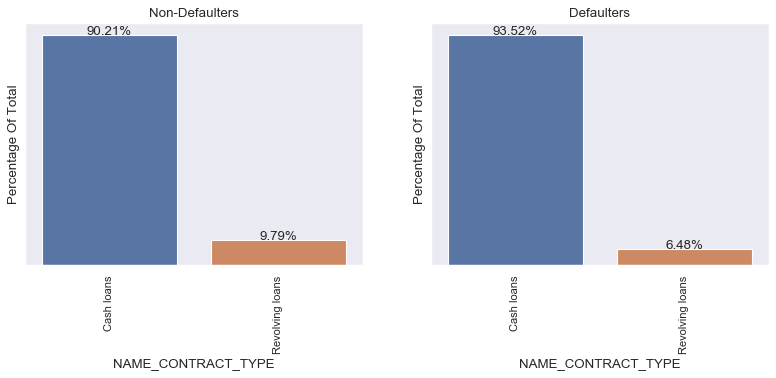

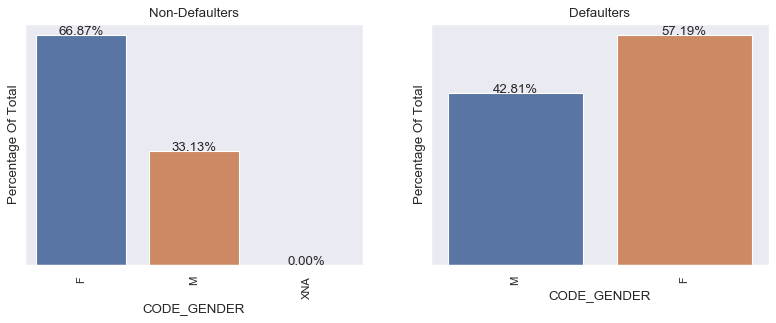

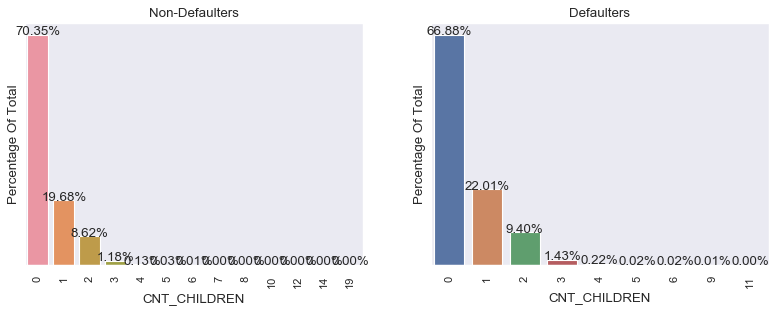

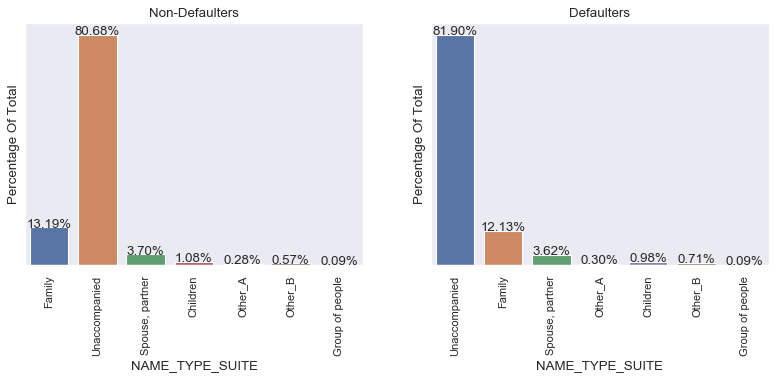

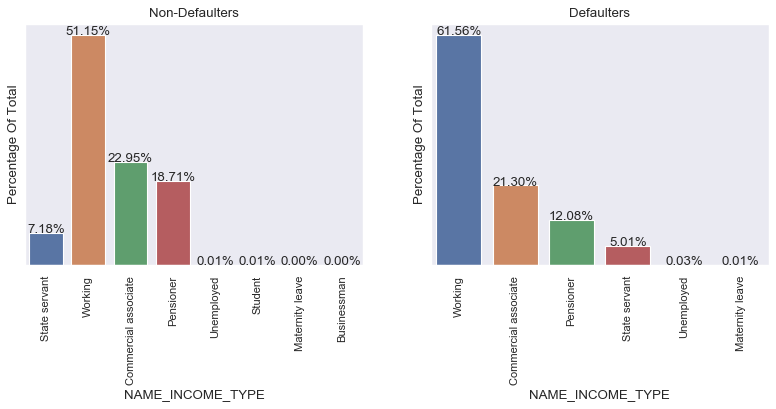

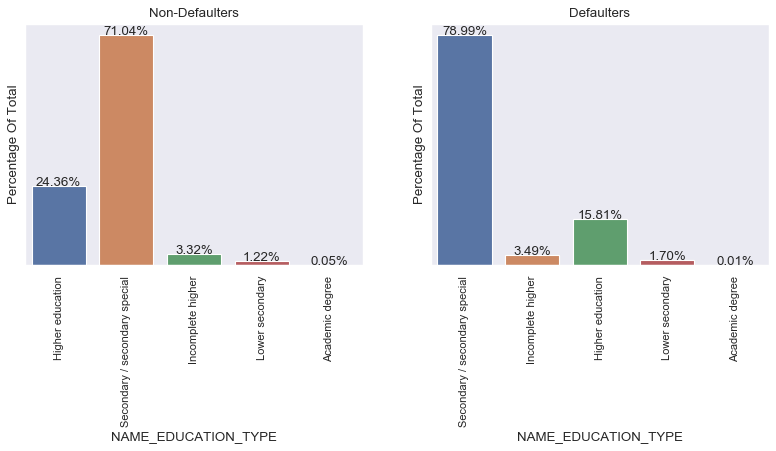

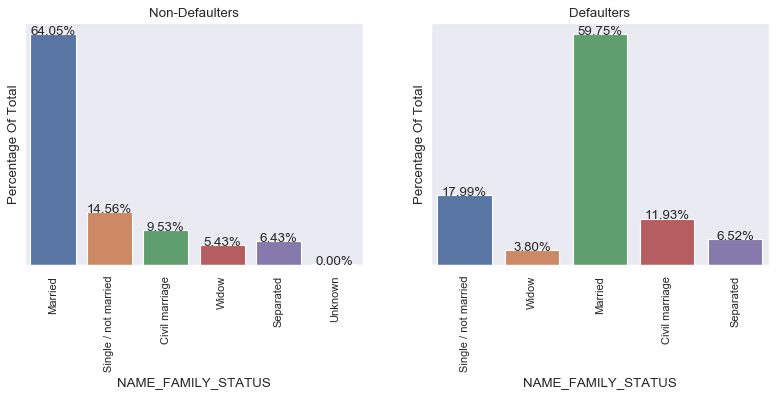

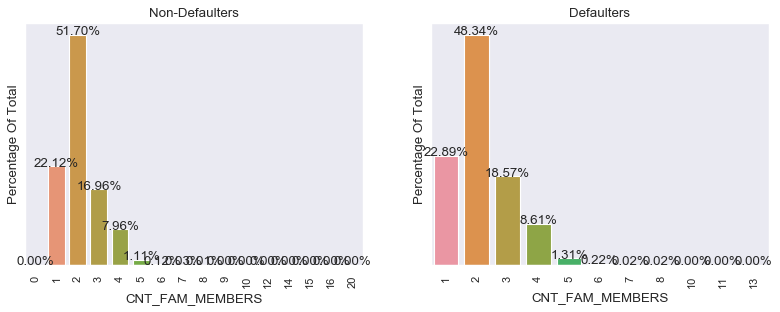

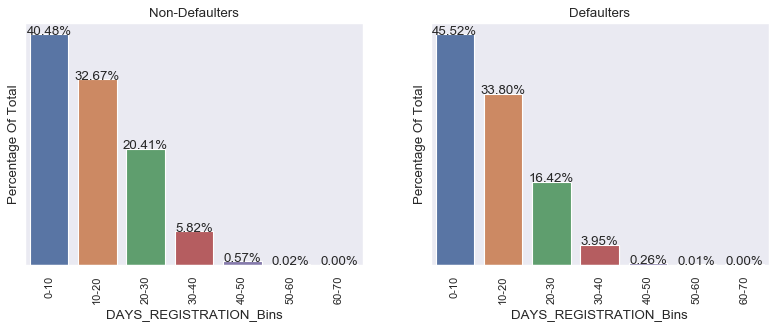

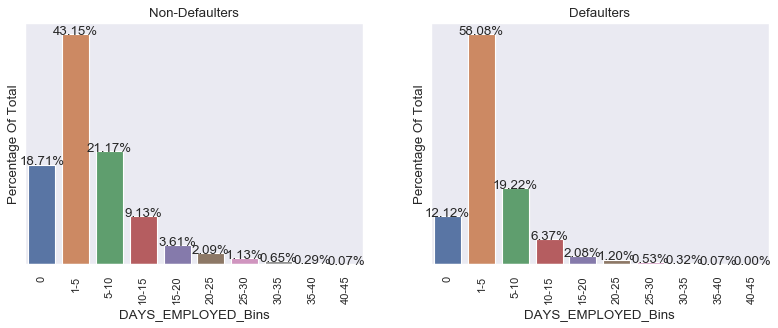

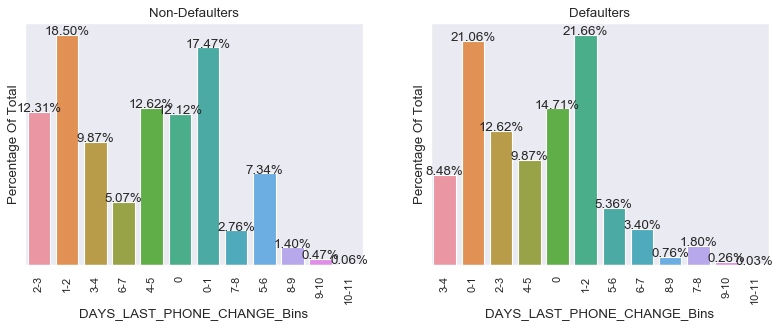

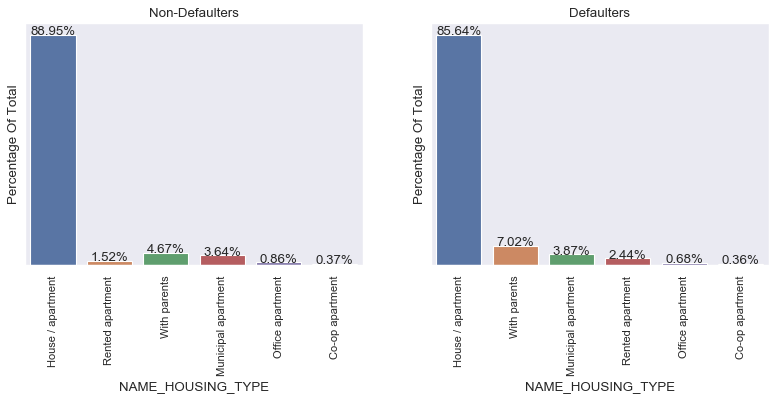

In [27]:
# Columnss for CountPlot 

catgcols=['NAME_CONTRACT_TYPE','CODE_GENDER','CNT_CHILDREN','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS'
      ,'CNT_FAM_MEMBERS','DAYS_REGISTRATION_Bins','DAYS_EMPLOYED_Bins','DAYS_LAST_PHONE_CHANGE_Bins','NAME_HOUSING_TYPE']
# Plots created for segmented Univariate Analysis for all the catagorical Variable 
#rank-frequency plots enable you to extract meaning even from seemingly trivial unordered categorical variables
sns.set(style="darkgrid")
total0 = float(len(T0Appl_DF))
total1 = float(len(T1Appl_DF))
for I in catgcols:
    plt.figure(num=None, figsize=(12,4), dpi=80, facecolor='w', edgecolor='k')   
    plt.subplot(1, 2, 1)
    plt.xticks(fontsize=10,rotation = 90)
    plt.yticks([])
    ax=sns.countplot(x=I, data=T0Appl_DF)
    for p in ax.patches:
       h = p.get_height() 
       ax.text(p.get_x()+p.get_width()/2,h+3,'{:1.2f}%'.format(100* h/total0),ha="center") 
    plt.title("Non-Defaulters")
    plt.ylabel("Percentage Of Total")
    plt.subplot(1, 2, 2)
    plt.xticks(fontsize=10,rotation = 90)
   
    ax=sns.countplot(x=I, data=T1Appl_DF)
    for p in ax.patches:
       h = p.get_height() 
       ax.text(p.get_x()+p.get_width()/2,h+3,'{:1.2f}%'.format(100* h/total1),ha="center")     
    sns.countplot(x=I, data=T1Appl_DF)
    plt.yticks([])
    plt.ylabel("Percentage Of Total")
    plt.title("Defaulters")
    plt.show()


### Results Of Univariate Analysis
``` Contract Type ``` : there are larger number of applicants are interested in cash loan and found that the percentage of defaulters are high in Cash loan compare to % of non-defaulters.

``` Gender ``` : female are defaulters as compared to male. Also as a whole There are more female applicants than male .

```Count OF Children ``` :  Most of the applicants doesnt have any child and the pattern is similar both both defaulter and non defaulter scenarios 

``` Family Type ``` : Most applicants are unaccompanied and those who has family have lesser chance to default as per the data 

```  Income Type ``` : Working Professionals have greater ratio/chance of missing loan payment where as other income type have lesser trend of defaulting the loan 

``` Education ``` : Though Pattern is similar but the defaulter with secondary education have higher chances of defaukting the loan comapred to others 

``` family Status ``` : According to the defaulter and non defaulter ratio appart form widow and unknown family status rest all category ratio is more as defaulter comapare to non defauters.


``` Count of Family Members ``` : Similar to Children Count most of the applicants are duos and there is a slight chances the loan default in case of 3 family members as per the sample data 

``` Age ``` : There are higher cases of defaults for people aged 20-40 compared to others 

``` Days Of Registration ``` : there is no significance diffrence but people with lesser years of registration are more likely to miss the payment 

``` Working Experiance ``` :  Strangly people with 1-5 years of experice have igher chances of missing loans .

``` Last Phone Change ``` : People who frequently change their phone numbers are more likely to default 

``` Hoursing Type ``` : People Living in Apartments have higher chances of default 




### Distribution Plot for Measures 

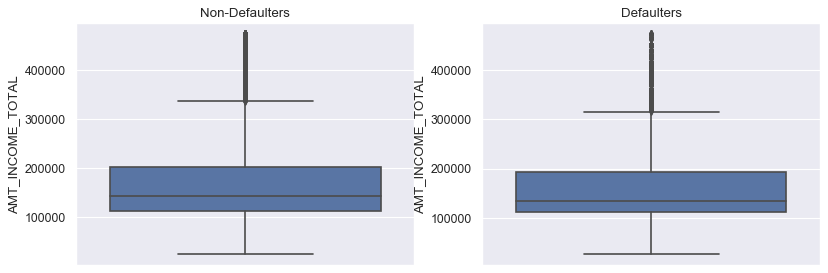

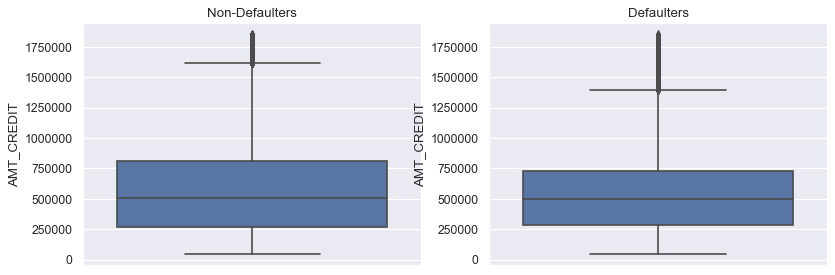

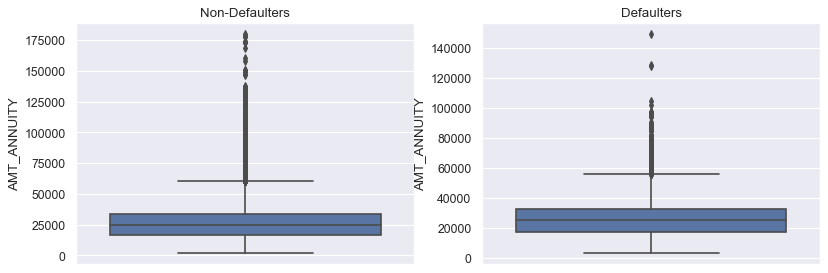

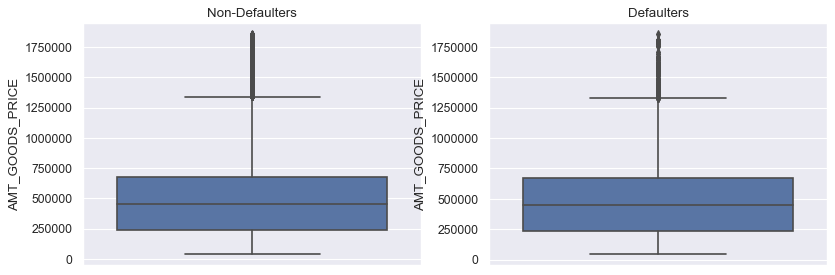

In [28]:
colsdist=['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
for I in colsdist:        
    plt.figure(num=None, figsize=(12,4), dpi=80, facecolor='w', edgecolor='k')
    plt.subplot(1, 2, 1)
    plt.title("Non-Defaulters")
    sns.boxplot(y=T0Appl_DF[I])
    #plt.yscale('log')
    plt.subplot(1, 2, 2)
    plt.title("Defaulters")
    sns.boxplot(y=T1Appl_DF[I])
    #plt.yscale('log')
    plt.show()


###  Analysis Results for the above plots  

We have plotted Box plots to find the distribution of measures for both Defaulers and non defaulters . Findings Mentioned Below 

``` Credit Amount ``` : For both Default and Non-Default Cases most of the data are spread accross 250K to 750K .

``` Anuuity Amount ``` : from the box plot we observed that the mean of dafauters have lesser annuity amount compared to non Defaulets and most of the data the annunity ammount is spread accros 15-30K .

``` Goods Price ``` : no Significant diffrence between Goods price 

``` Amount Income Total ``` : As per the above distributions most people with lesser income amount have are more likely to default as the box plot is on the lower side compared to box plot of non-defaulters income amount 



# Correlation 

In [29]:
Col=['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','CNT_CHILDREN','CNT_FAM_MEMBERS','DAYS_BIRTH'
     ,'DAYS_REGISTRATION','DAYS_EMPLOYED','DAYS_LAST_PHONE_CHANGE']
T0Appl_Curr_DF = T0Appl_DF[Col]
T1Appl_Curr_DF = T1Appl_DF[Col]

cor0 = round(T0Appl_Curr_DF.corr(),3)
cor1 = round(T1Appl_Curr_DF.corr(),3)

print(cor1,'\n',cor0)

                        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL                   1.000       0.334        0.416   
AMT_CREDIT                         0.334       1.000        0.740   
AMT_ANNUITY                        0.416       0.740        1.000   
CNT_CHILDREN                      -0.002       0.000        0.032   
CNT_FAM_MEMBERS                    0.005       0.054        0.076   
DAYS_BIRTH                        -0.004       0.136        0.010   
DAYS_REGISTRATION                 -0.036       0.030       -0.033   
DAYS_EMPLOYED                      0.063       0.094        0.069   
DAYS_LAST_PHONE_CHANGE             0.084       0.112        0.077   

                        CNT_CHILDREN  CNT_FAM_MEMBERS  DAYS_BIRTH  \
AMT_INCOME_TOTAL              -0.002            0.005      -0.004   
AMT_CREDIT                     0.000            0.054       0.136   
AMT_ANNUITY                    0.032            0.076       0.010   
CNT_CHILDREN                   1.

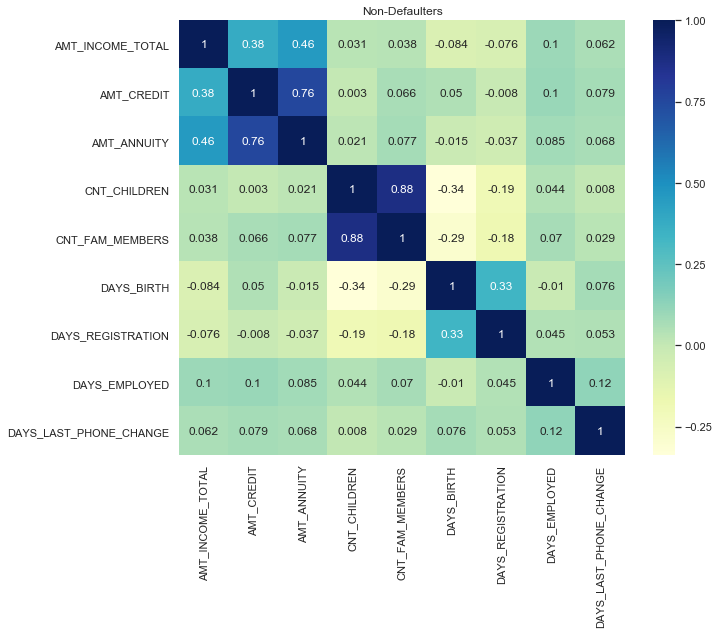

In [30]:
plt.figure(figsize=(10,8))

# heatmap
plt.title("Non-Defaulters")
sns.heatmap(cor0, cmap="YlGnBu", annot=True)
plt.show()

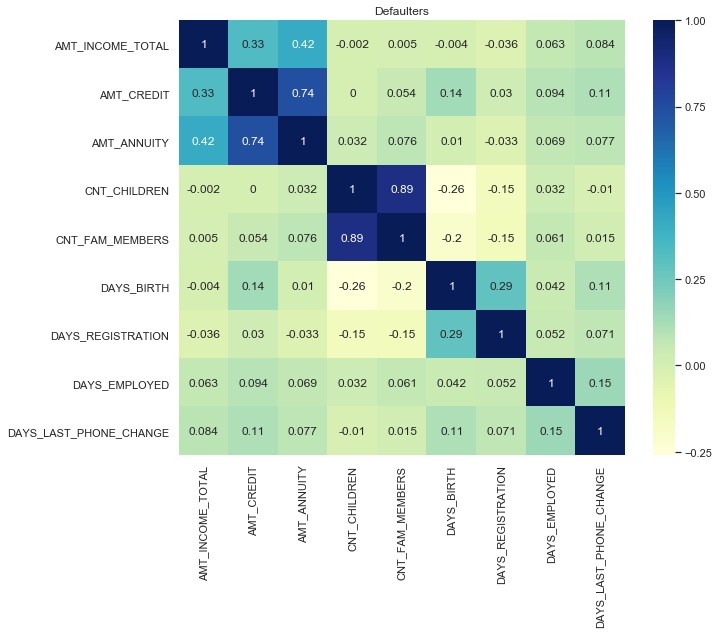

In [31]:
plt.figure(figsize=(10,8))

# heatmap
plt.title("Defaulters")
sns.heatmap(cor1, cmap="YlGnBu", annot=True)
plt.show()

# Findings from the correlation Matrix 

As per the correlation matrix and heatmat the Count of Family Member and Count of Childeren have highest correlation Value as obvios . after that the Annuity amount and Credit amount is also highly correlated for both default and non-default cases . 

Also for both cases Days after registation and Age are correlated as well for both defalut and non default Cases 

## Bivariate Analysis 

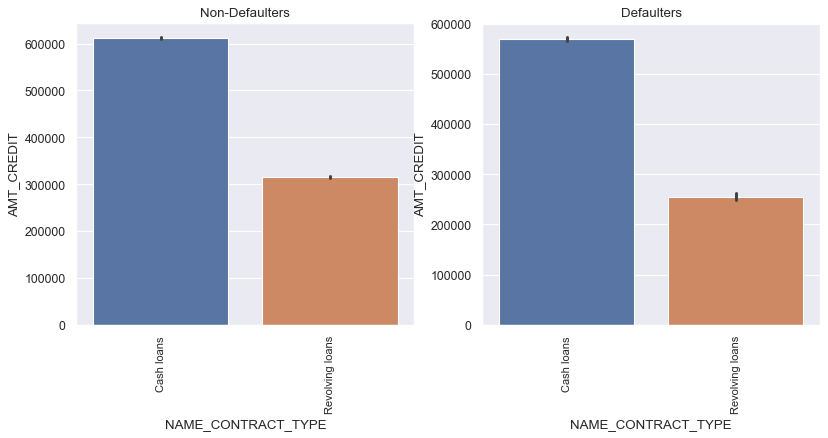

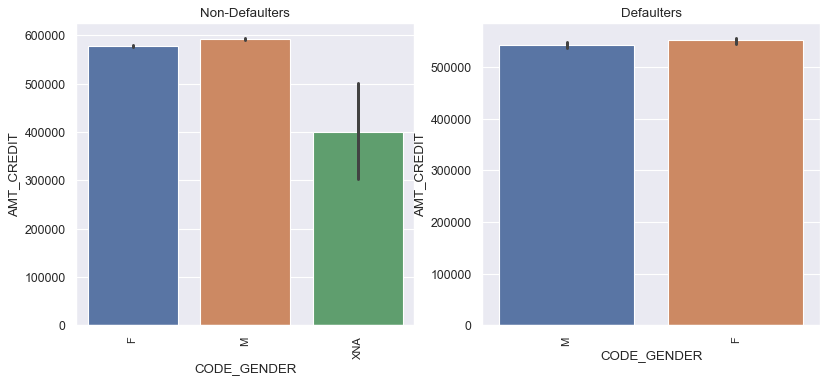

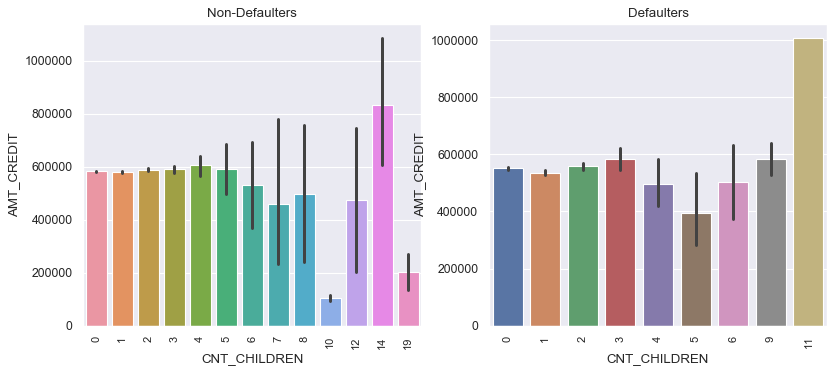

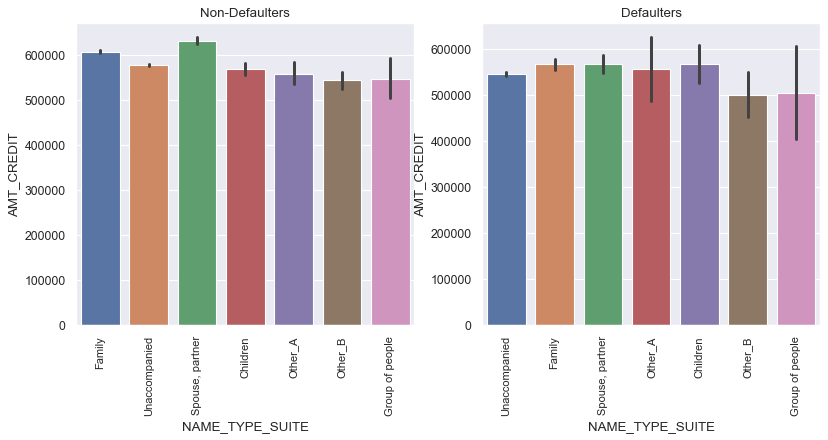

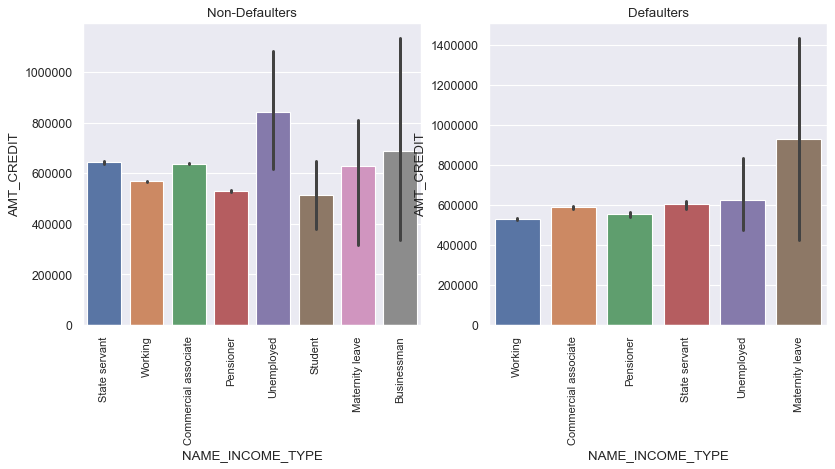

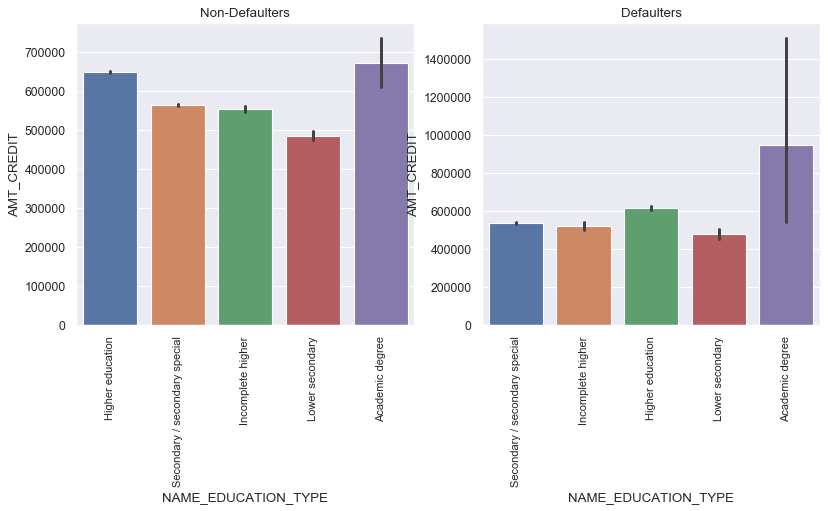

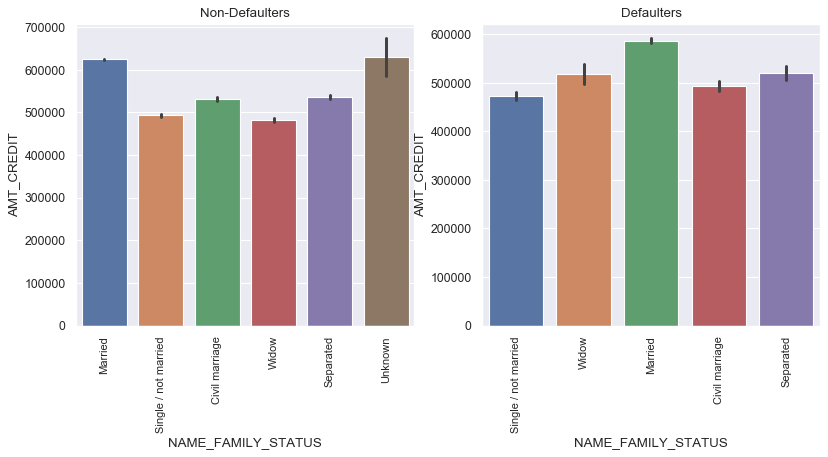

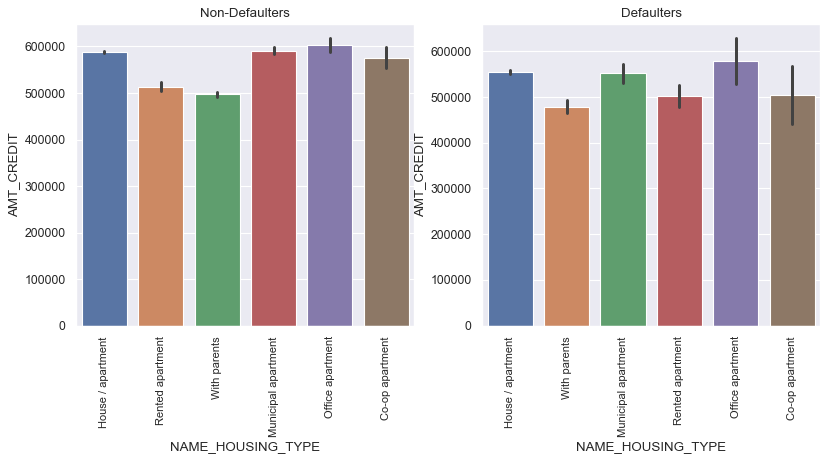

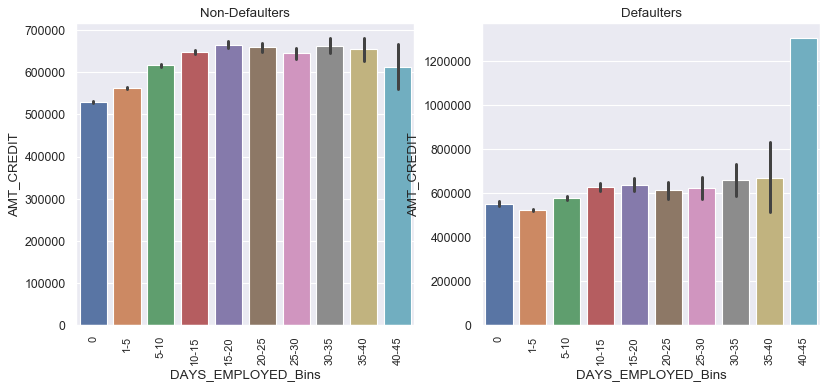

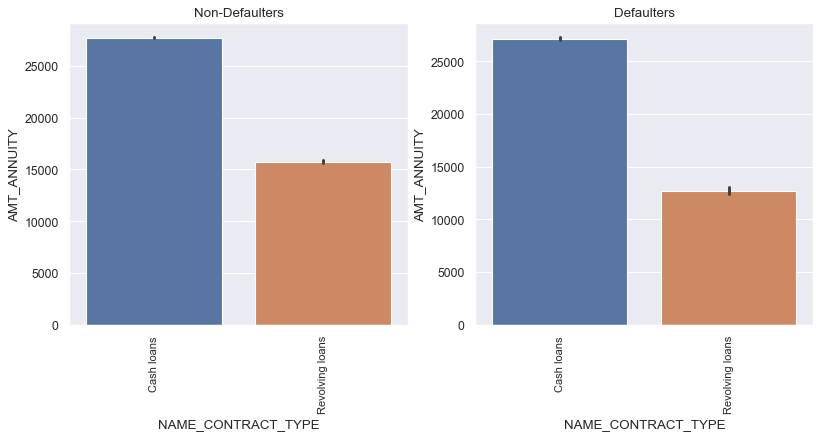

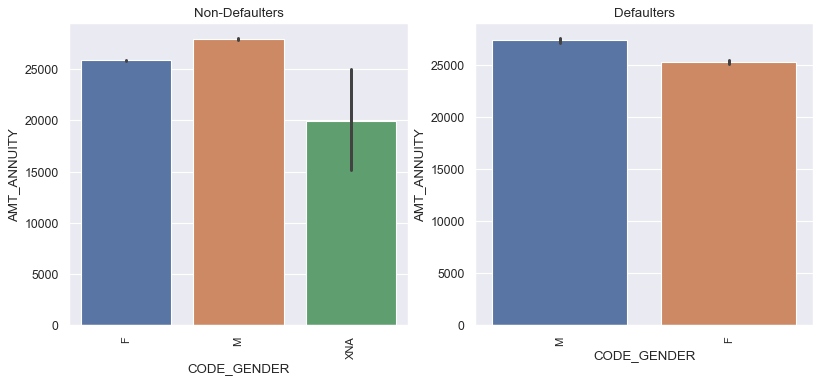

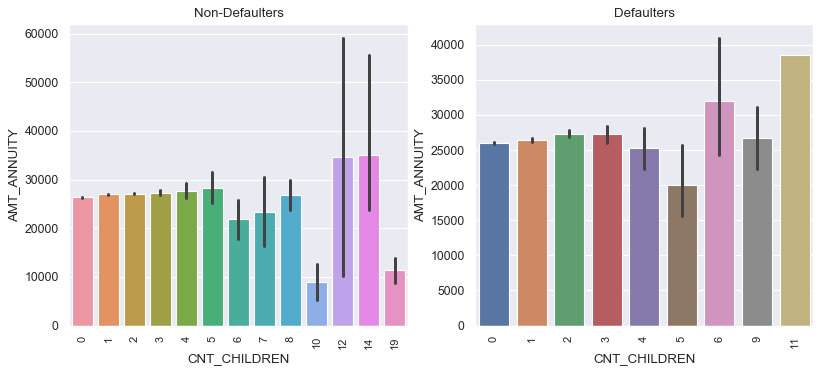

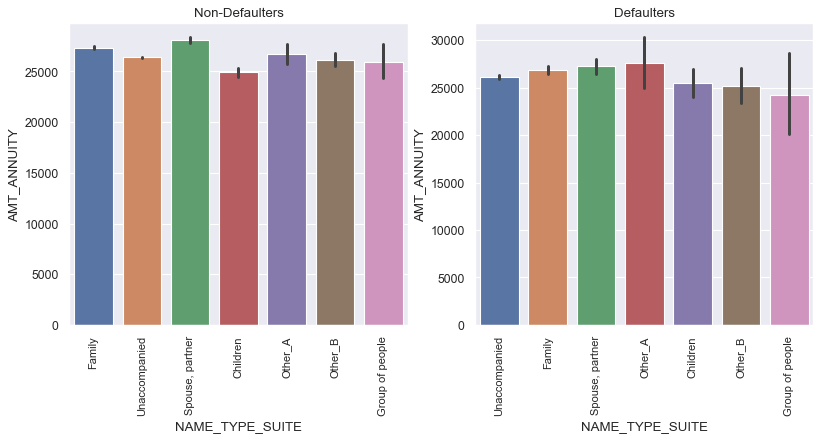

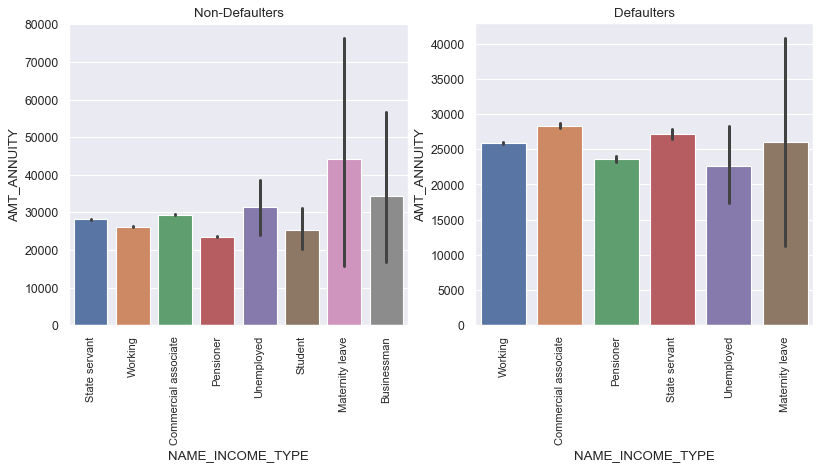

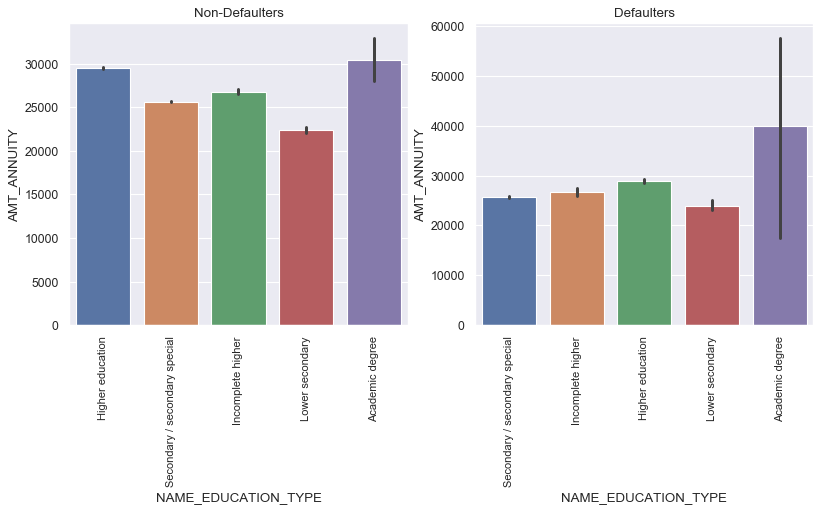

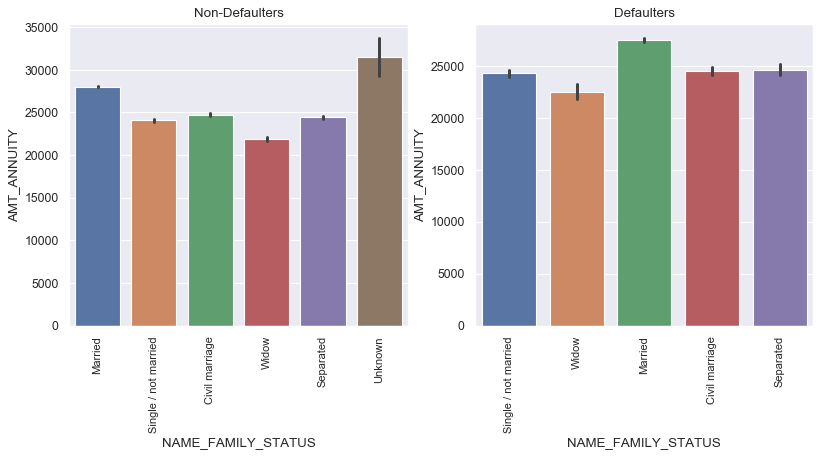

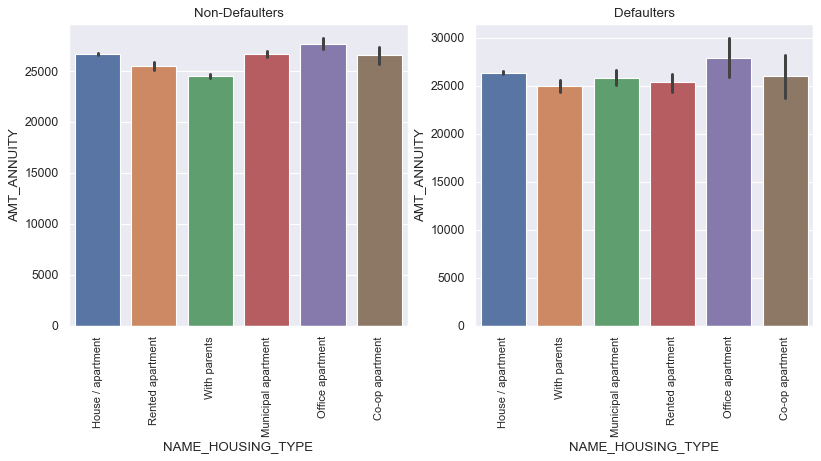

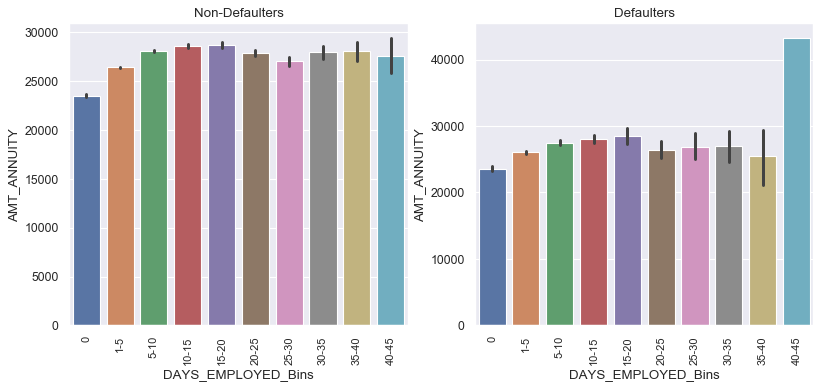

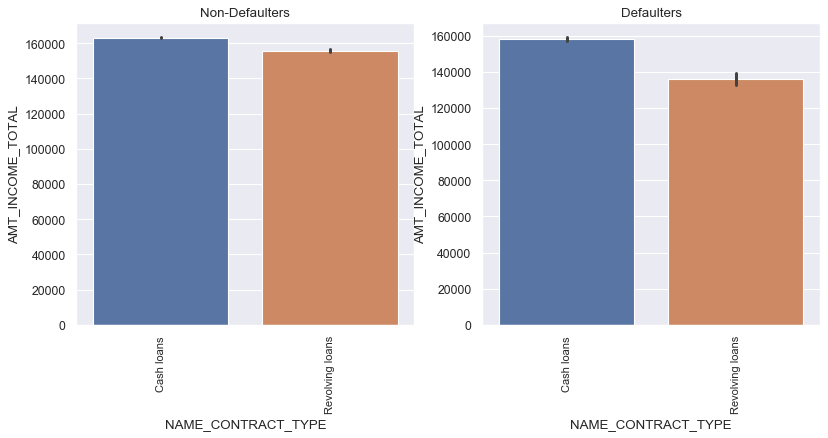

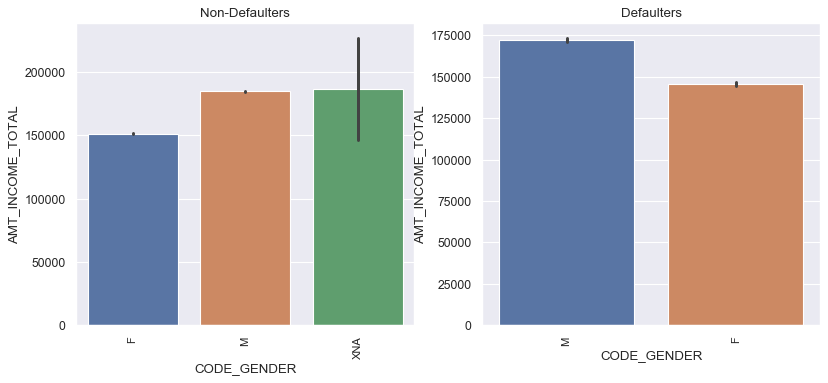

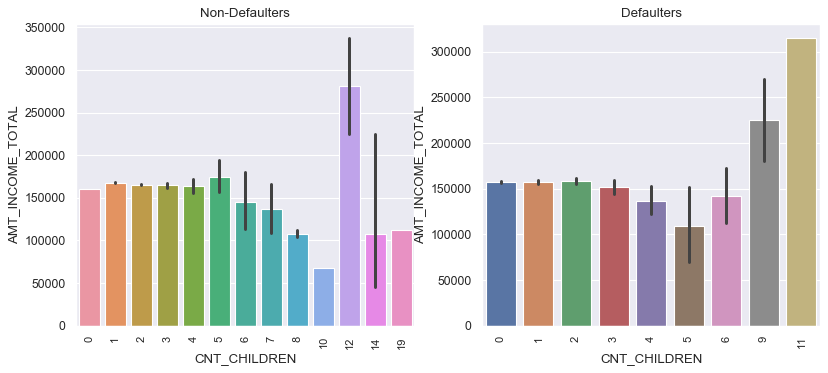

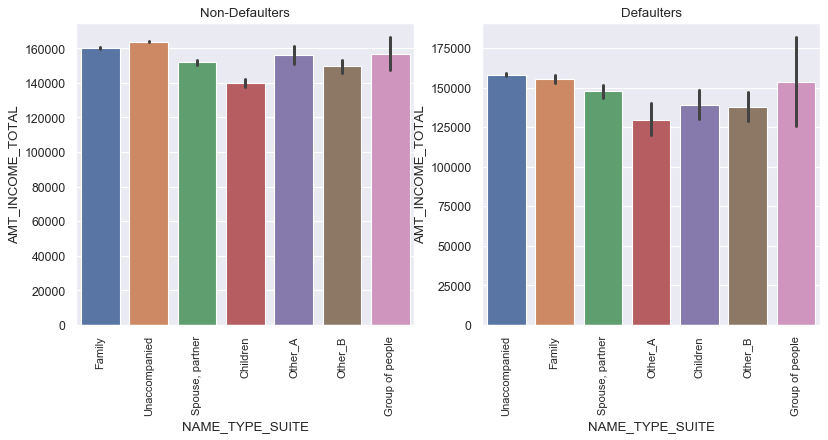

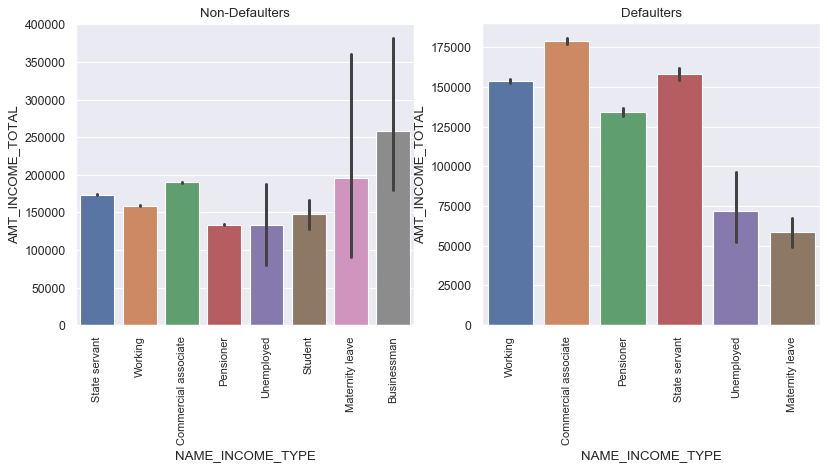

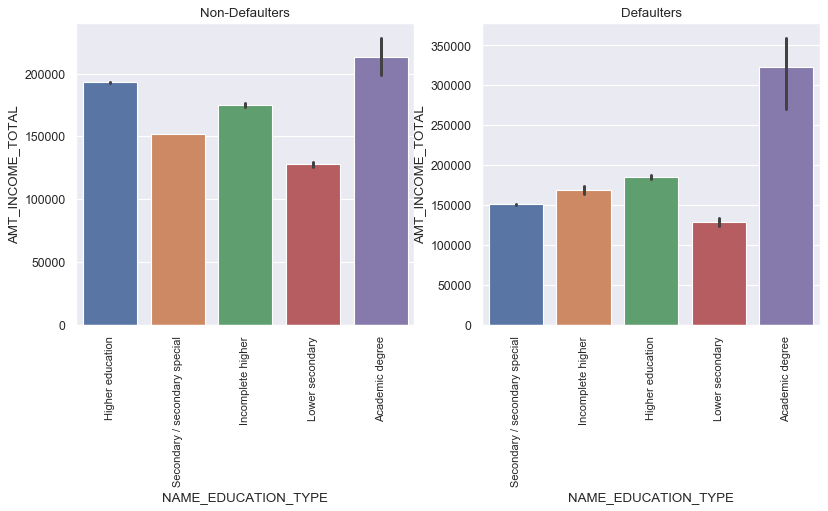

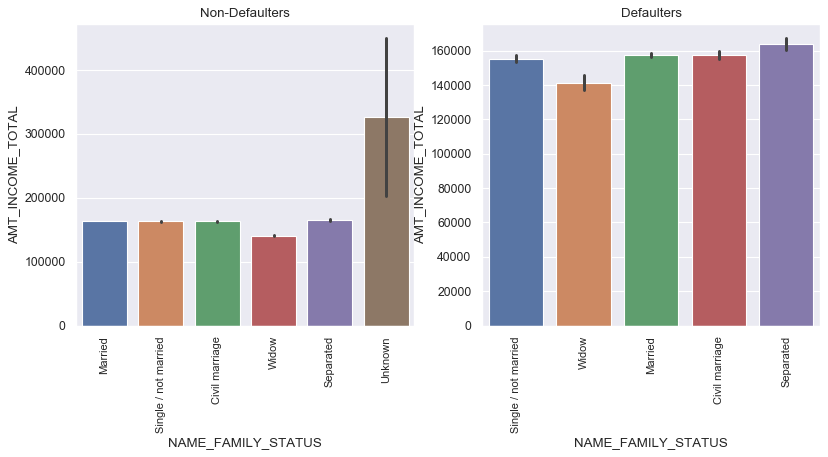

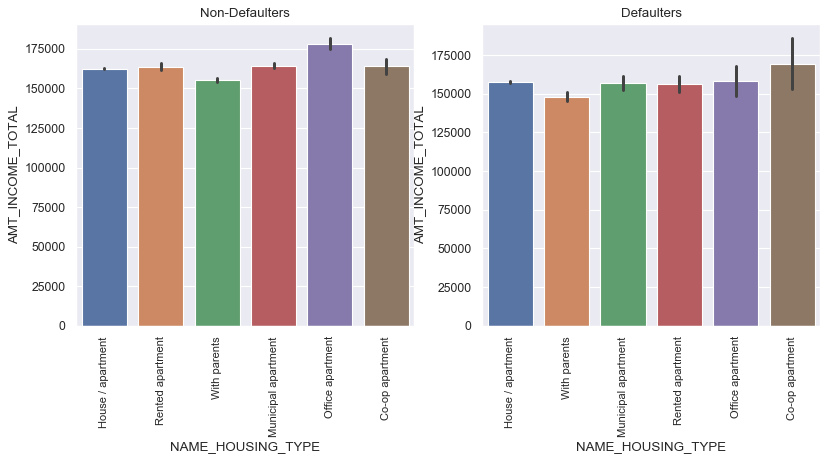

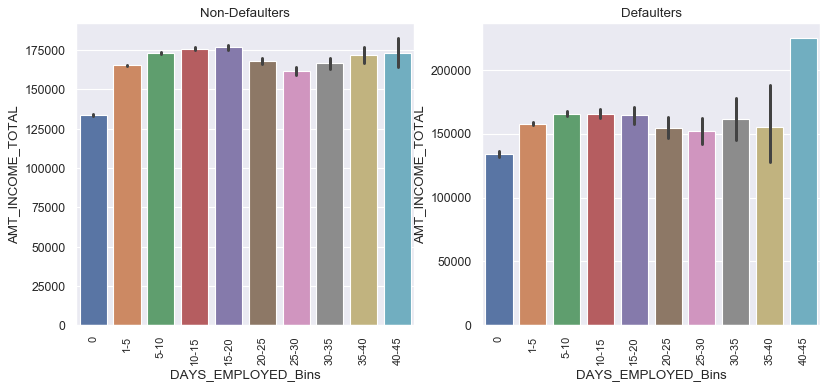

In [32]:
colsdist=['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL']
catgcols=['NAME_CONTRACT_TYPE','CODE_GENDER','CNT_CHILDREN','NAME_TYPE_SUITE',
          'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_EMPLOYED_Bins']
      
for I in colsdist:
    for J in catgcols:
        plt.figure(num=None, figsize=(12,5), dpi=80, facecolor='w', edgecolor='k')
        plt.subplot(1, 2, 1)
        plt.xticks(fontsize=10,rotation = 90)
        plt.title("Non-Defaulters")
        sns.barplot(data =T0Appl_DF , y=I, x=J)
        plt.subplot(1, 2, 2)
        plt.title("Defaulters")
        plt.xticks(fontsize=10,rotation = 90)
        sns.barplot(data =T1Appl_DF , y=I, x=J)
        plt.show()   
                

### Analysis Finding 

We have plotted/Analyzed various catagorical dimenstions and measures and some of the analysis are mentioned below  

``` Count Of Children & Credit Amount  ```: As per the Data people with 10+ chileren and avg credit amount 100K have more chanes of default 

``` Credit Amount & Family Type ``` : As per the Data above married couples have with higher credit amount mean are less likely to default and their credit amount is higher compared to other non defaulters so it is safe to handover loan th that category .

``` Worktype  and Credit Amount ``` : Unemployed persons are have higher avarage of non defaulter . as per above graph the are very less likely to defalut and have highest avgrage of credit as non default .

``` Education and Credit amount ``` : People with academic degree are less likely to default and have higher credit balance as well ,also    for both tables people with academic degree have highest credit balance .
         

``` Work Exepriance and Credit balance ``` : People with academic degree are less likely to default and have higher credit balance as well ,also    for both tables people with academic degree have highest credit balance .
         

``` Education and Annuity amount ``` : Just like credit balance people with annuity are less likely to default but for people with academic degree have more anuuity avg than the others for the dafault cases ,



``` Family Type and Annual income ``` : Overall people with higher income are less likely to default but if we compare the family type also we found that defaulters with higher income values re group of people 



#### Data Cleaning,Handling Missing Data,treating Outliers of Previous Applications Data 

In [33]:
Master_DF = pd.merge(Prev_Appl_DF, FAppl_DF, how = 'left', on = 'SK_ID_CURR')


In [34]:
# DATA CLEANING of master DF
round(100*(Master_DF.isnull().sum()/len(Master_DF.index)), 2).sort_values(ascending=False).head(35)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE_x              49.12
DAYS_FIRST_DUE                 40.30
DAYS_TERMINATION               40.30
DAYS_LAST_DUE                  40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
AMT_GOODS_PRICE_x              23.08
CNT_PAYMENT                    22.29
AMT_ANNUITY_x                  22.29
NAME_TYPE_SUITE_y              16.79
AMT_GOODS_PRICE_y              16.65
DAYS_REGISTRATION_Bins         16.60
DAYS_EMPLOYED_Bins             16.59
AMT_INCOME_TOTAL               16.58
NAME_HOUSING_TYPE              16.58
DAYS_BIRTH_Bins                16.58
DAYS_REGISTRATION              16.58
DAYS_LAST_PHONE_CHANGE         16.58
ORGANIZATION_TYPE              16.58
CNT_FAM_MEMBERS                16.58
DAYS_EMPLOYED                  16.58
DAYS_LAST_PHONE_CHANGE_Bins    16.58
D

In [35]:
dropC=Master_DF.columns[Master_DF.isnull().mean() > 0.15].tolist()
dropC.remove('AMT_CREDIT_y')
dropC.remove('AMT_ANNUITY_y')    
dropC.remove('TARGET')
Master_DF.drop(dropC , axis=1 , inplace=True)

In [36]:
round(100*(Master_DF.isnull().sum()/len(Master_DF.index)), 2).sort_values(ascending=False).head(30)

AMT_ANNUITY_y                  16.58
TARGET                         16.58
AMT_CREDIT_y                   16.58
PRODUCT_COMBINATION             0.02
NAME_CONTRACT_STATUS            0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE_x            0.00
AMT_APPLICATION                 0.00
AMT_CREDIT_x                    0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_PAYMENT_TYPE               0.00
DAYS_DECISION                   0.00
CODE_REJECT_REASON              0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
NAME_YIELD_GROUP                0.00
SK_ID_PREV                      0.00
dtype: float64

In [37]:
Master_DF.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_APPLICATION,AMT_CREDIT_x,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,TARGET,AMT_CREDIT_y,AMT_ANNUITY_y
0,2030495,271877,Consumer loans,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle,POS mobile with interest,0.0,533668.5,25803.0
1,2802425,108129,Cash loans,607500.0,679671.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action,Cash X-Sell: low,0.0,135000.0,6750.0
2,2523466,122040,Cash loans,112500.0,136444.5,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high,0.0,284400.0,16456.5
3,2819243,176158,Cash loans,450000.0,470790.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle,0.0,1687266.0,64395.0
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high,0.0,628069.5,34200.0


In [38]:
# Since 'TARGET' ' columns have large number of NaN values, drop all the rows with NaNs at this column using the
# 'isnan' function of NumPy alongwith a negation '~'

Master_DF = Master_DF[~np.isnan(Master_DF['TARGET'])]

In [39]:
# since the gap between Q75 and max is high lets try for Q75 & Q95+Q99
print('Q75 \n ',Master_DF[['AMT_APPLICATION','AMT_CREDIT_y','AMT_ANNUITY_y']].quantile(0.75) )
print('Q99995 \n ',Master_DF[['AMT_APPLICATION','AMT_CREDIT_y','AMT_ANNUITY_y']].quantile(0.99995), '\n MAX \n' ,Master_DF[['AMT_APPLICATION','AMT_CREDIT_y','AMT_ANNUITY_y']].quantile(1)) #*100


Q75 
  AMT_APPLICATION    180000.0
AMT_CREDIT_y       787131.0
AMT_ANNUITY_y       33934.5
Name: 0.75, dtype: float64
Q99995 
  AMT_APPLICATION    3150000.0
AMT_CREDIT_y       1849500.0
AMT_ANNUITY_y       135724.5
Name: 0.99995, dtype: float64 
 MAX 
 AMT_APPLICATION    4455000.0
AMT_CREDIT_y       1854000.0
AMT_ANNUITY_y       177826.5
Name: 1, dtype: float64


In [40]:
# Since there is Huge Gap  between Q99(99% quantile) and Max value
# for all the 3 numerical fields we are removing all the values
Q99AC=Master_DF['AMT_CREDIT_y'].quantile(0.99995)
Q99AA=Master_DF['AMT_ANNUITY_y'].quantile(0.99995)
print(len(Master_DF)-len(Master_DF[Master_DF['AMT_CREDIT_y']<=Q99AC]), " Records Deleted for Amnt Credit")
Master_DF=Master_DF[Master_DF['AMT_CREDIT_y']<=Q99AC]
print(len(Master_DF)-len(Master_DF[Master_DF['AMT_ANNUITY_y']<=Q99AA]), " Records Deleted AMT_ANNUITY ")
Master_DF=Master_DF[Master_DF['AMT_ANNUITY_y']<=Q99AC]



69  Records Deleted for Amnt Credit
69  Records Deleted AMT_ANNUITY 


In [41]:
#DATA FIX and Binning 

def positive(row):
    if row<0:
        return row*-1
    else:
        return row
Master_DF['DAYS_DECISION']=Master_DF['DAYS_DECISION'].apply(positive)


bins,labels=binning(1,9)
Master_DF['DAYS_DECISION_bins']=pd.cut(Master_DF['DAYS_DECISION'], bins=bins, labels=labels)


In [42]:
Col_catg=['NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY','DAYS_DECISION_bins',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']
dist_col=['AMT_ANNUITY_y','AMT_CREDIT_y']

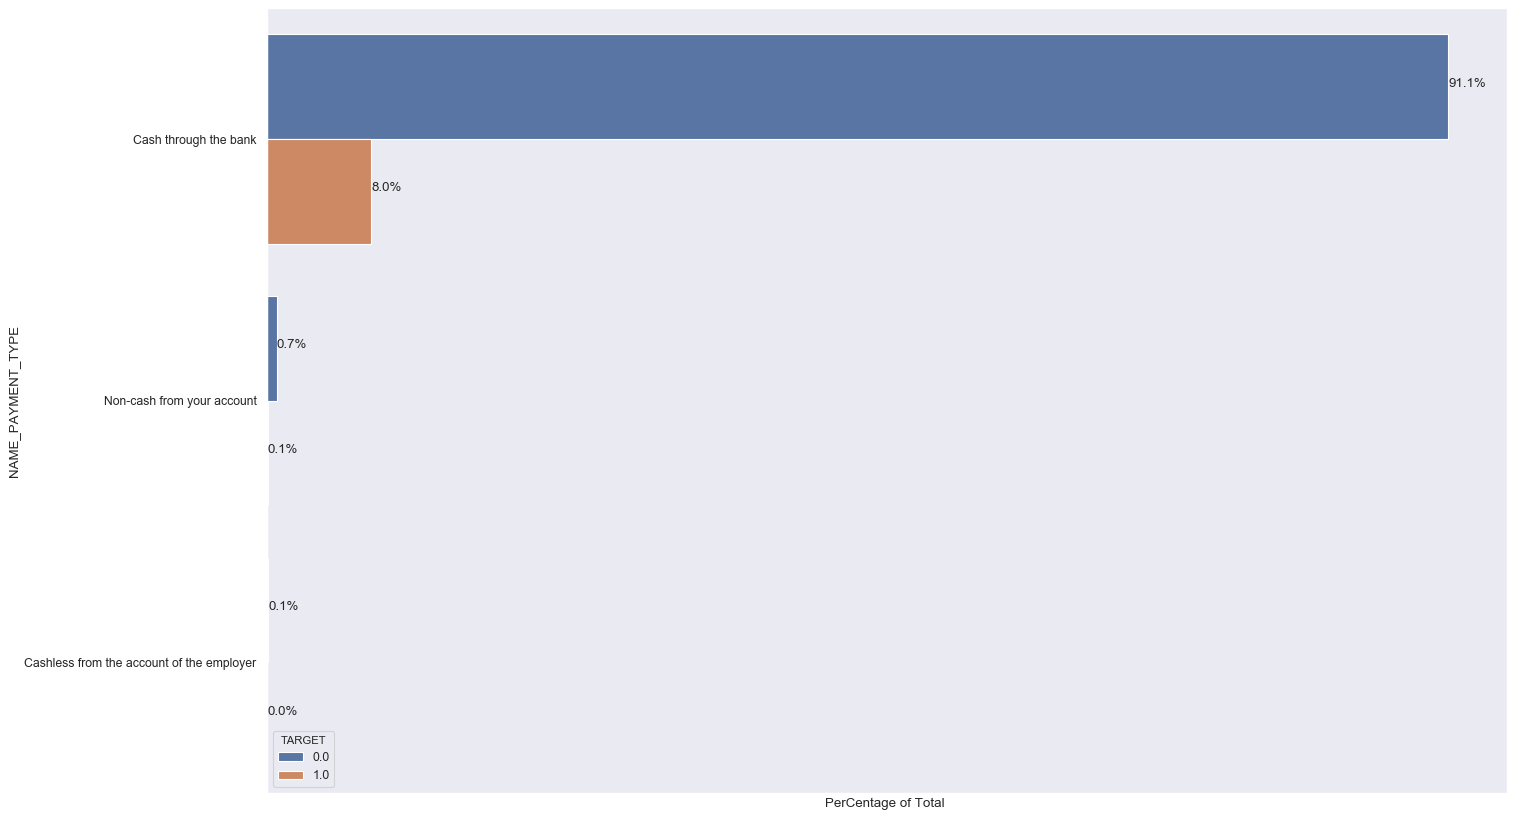

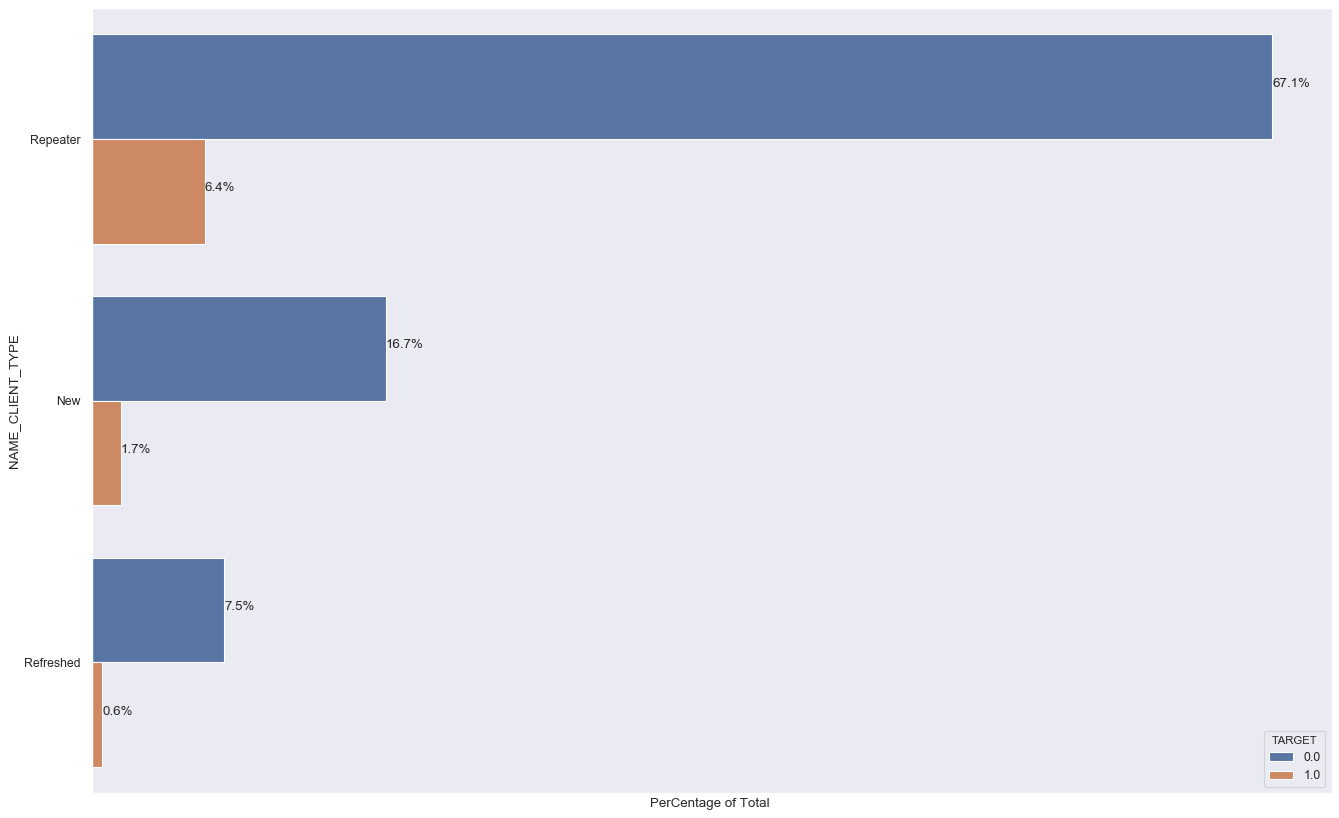

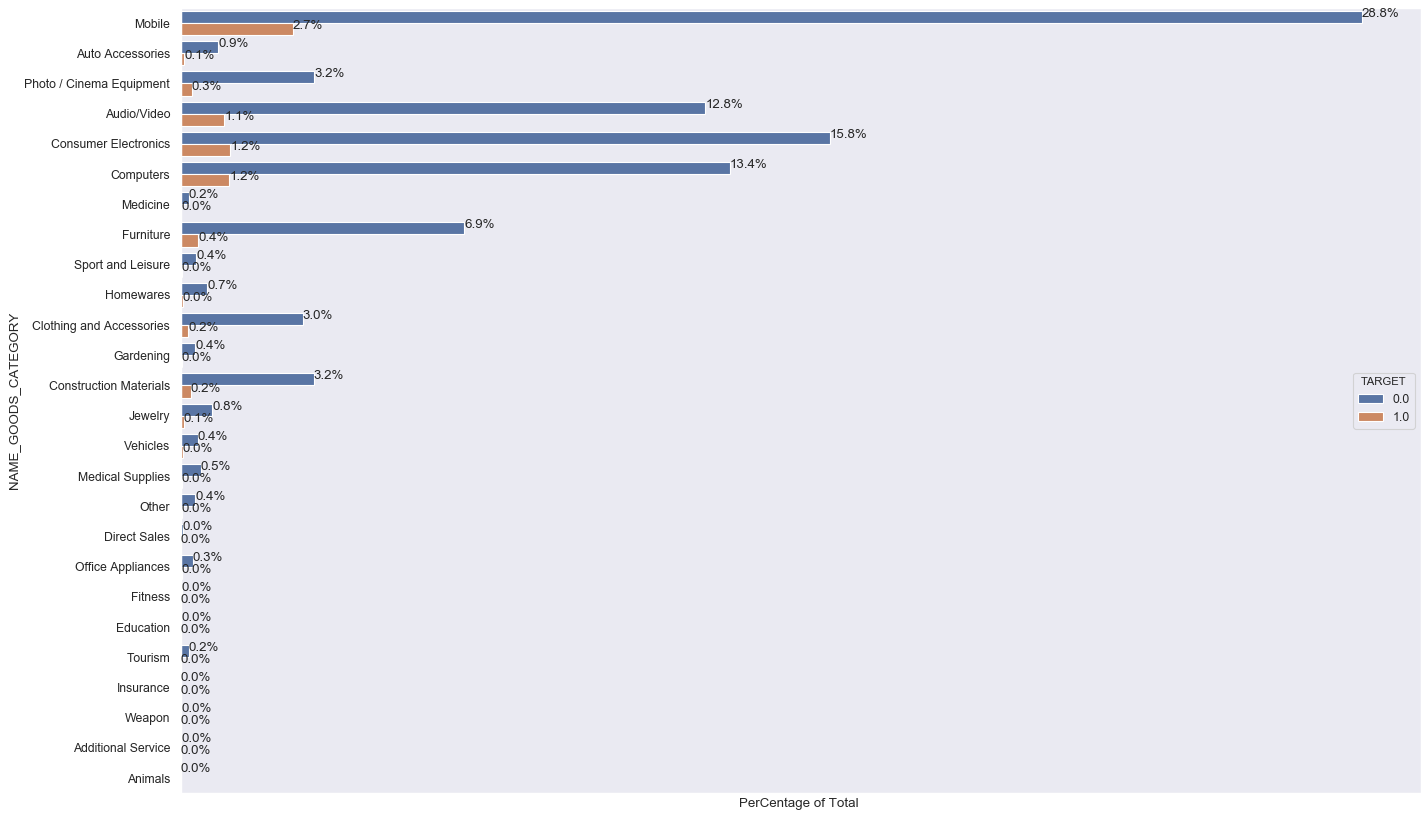

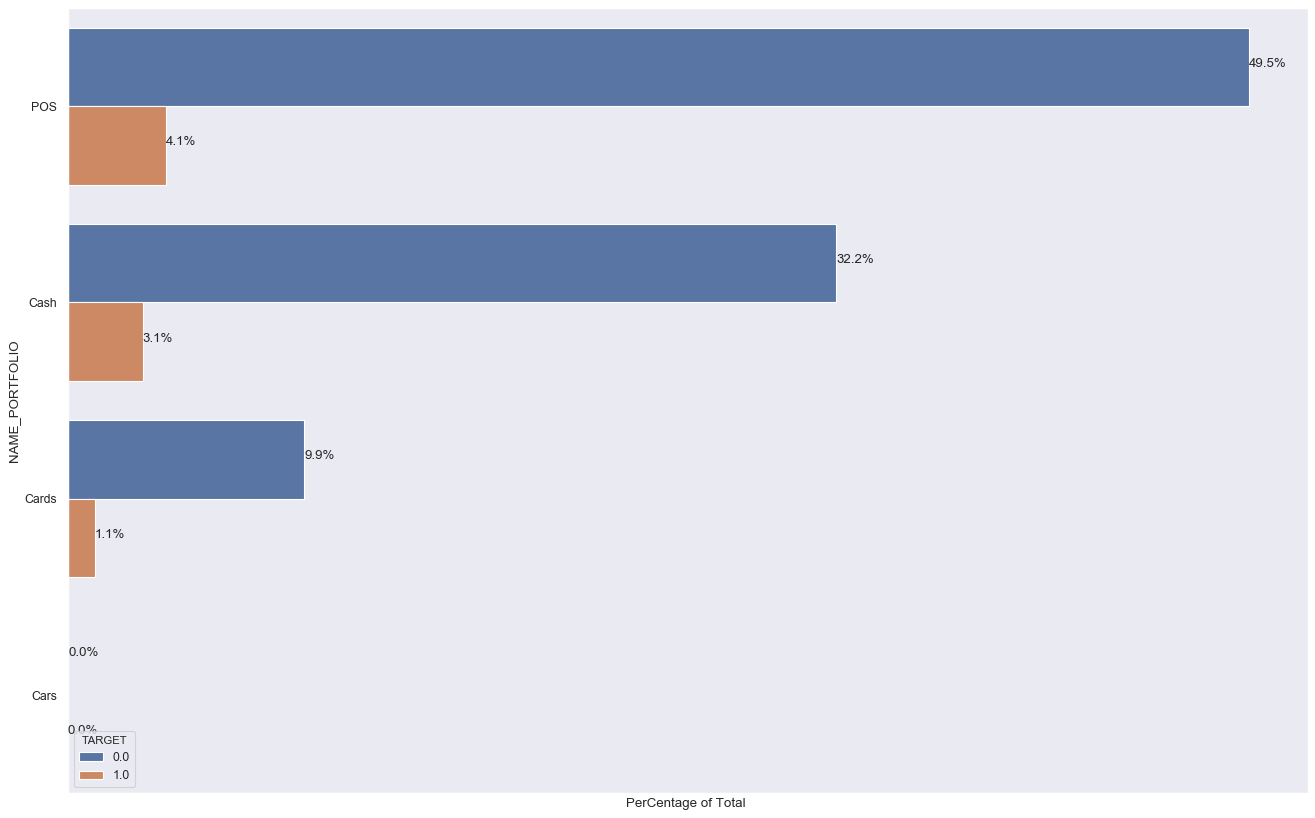

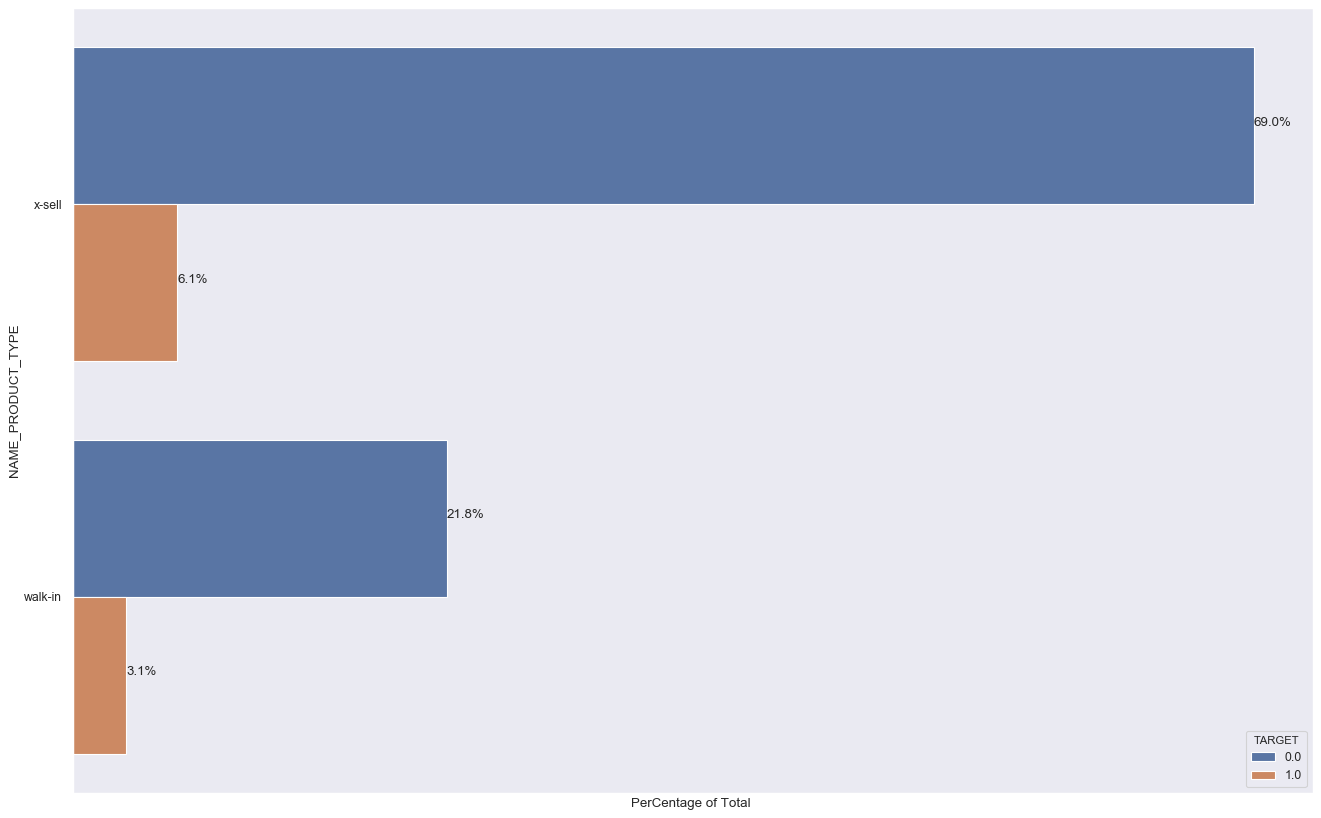

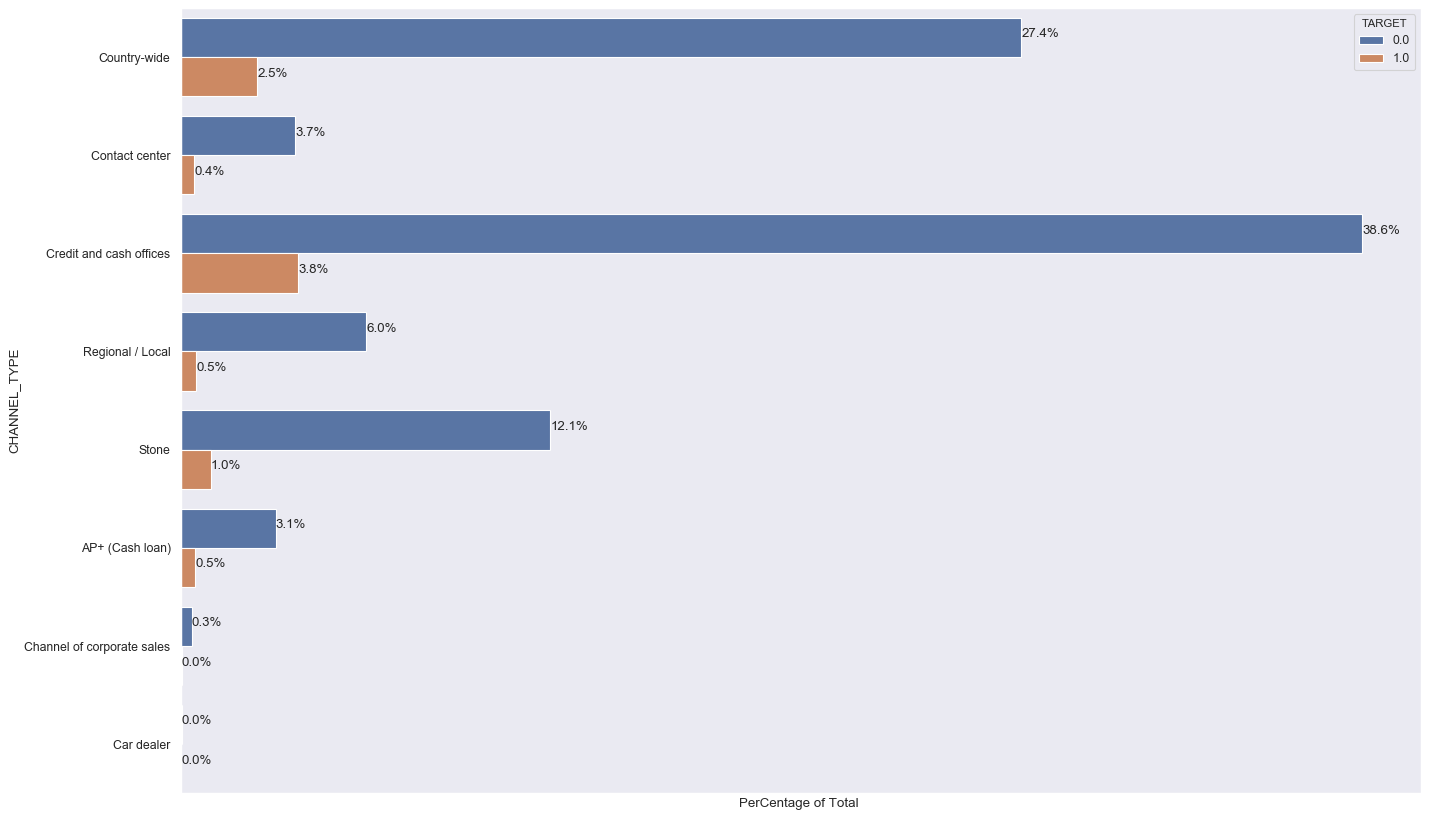

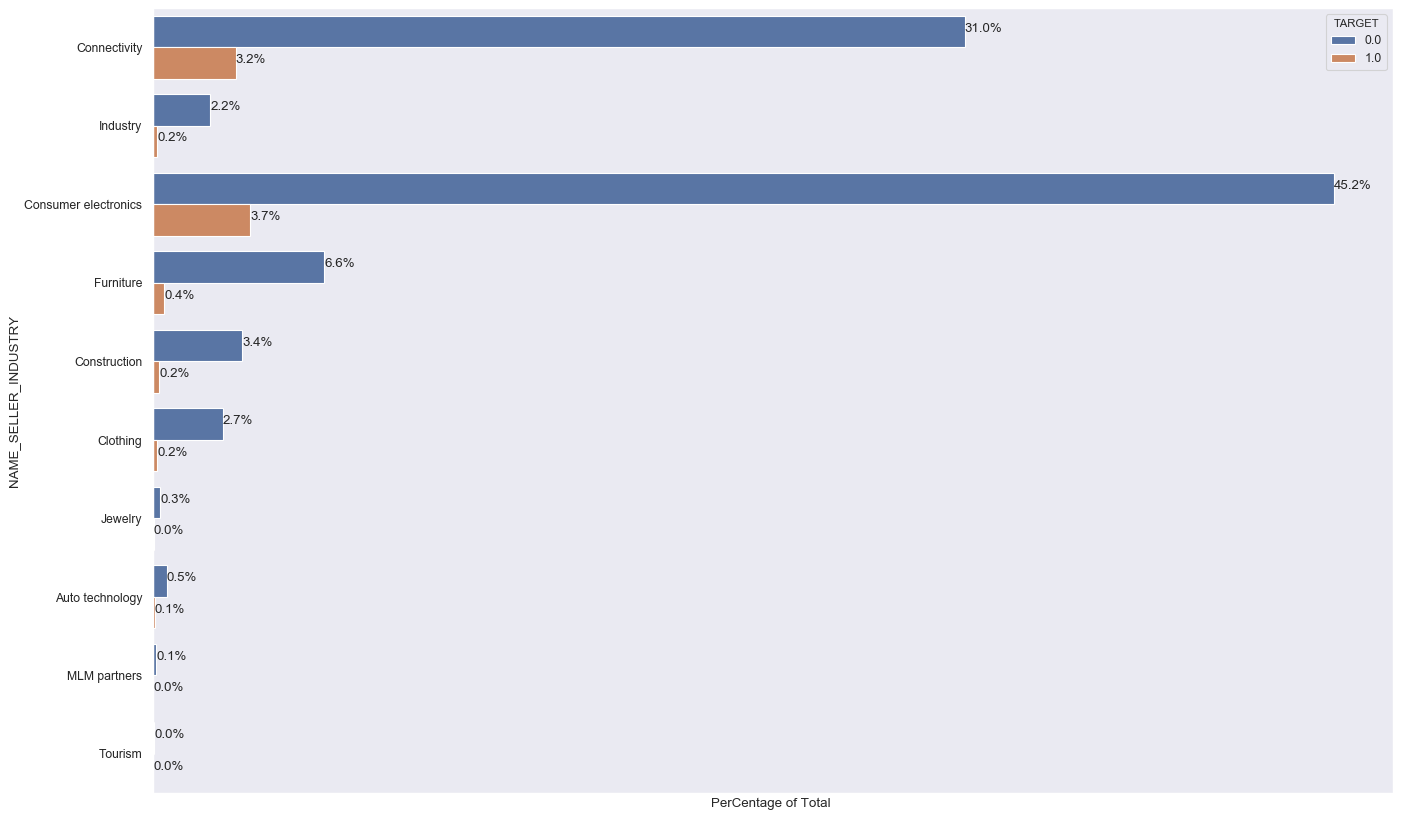

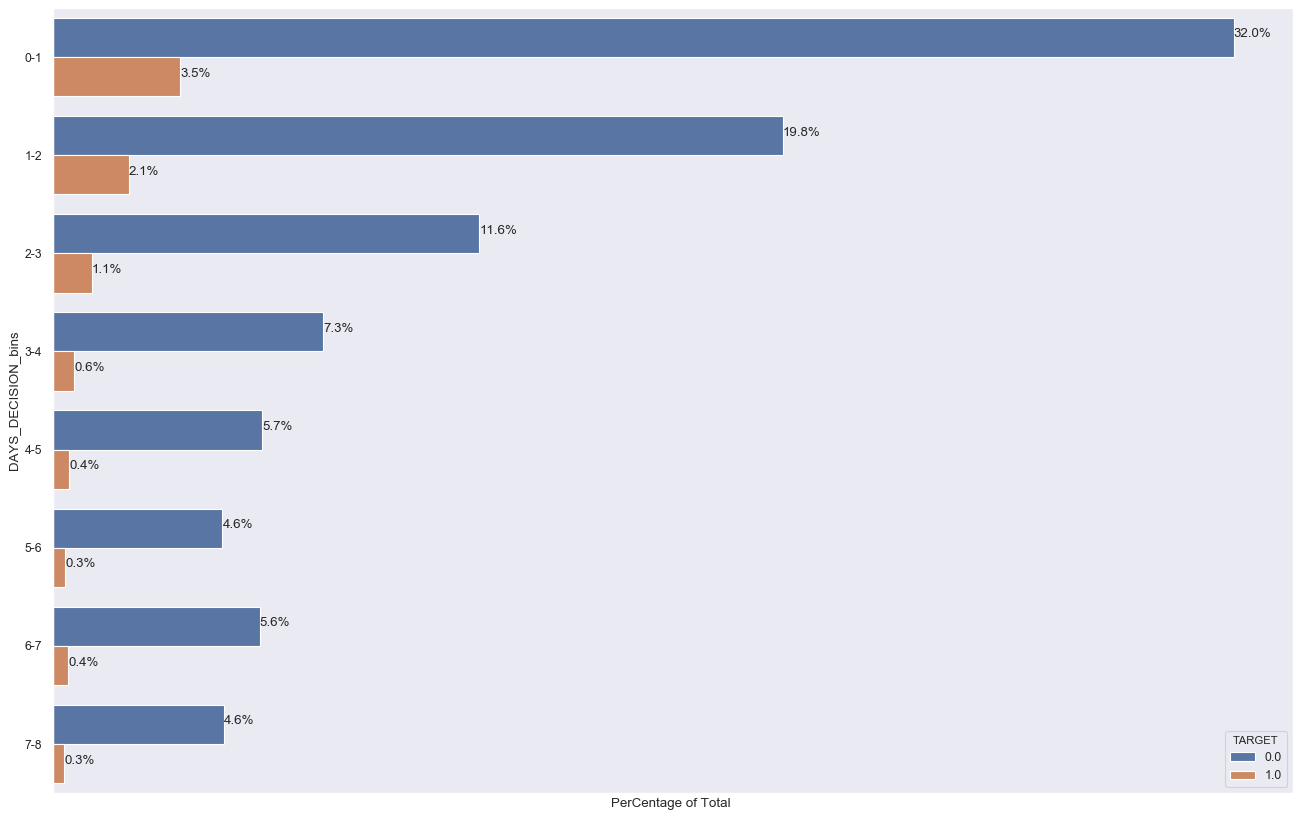

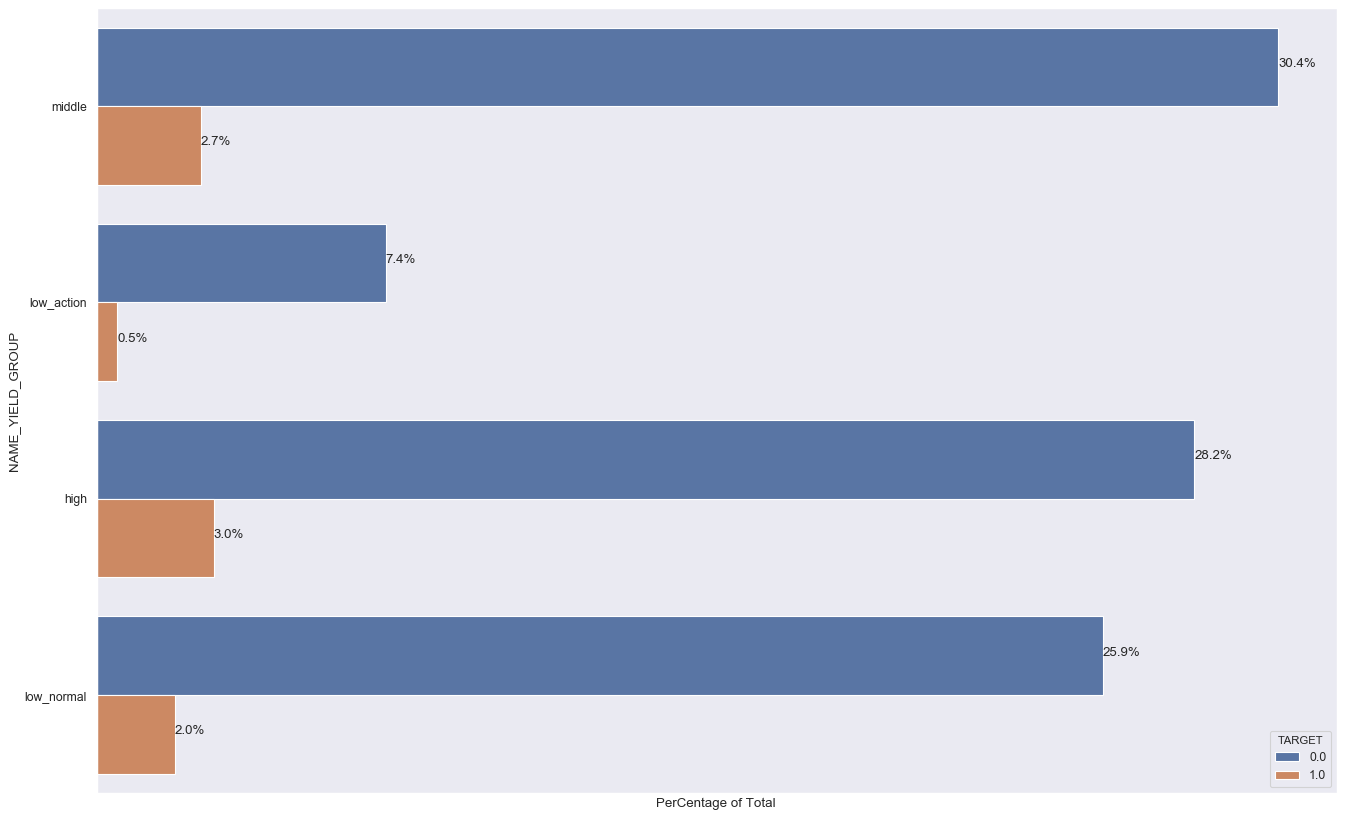

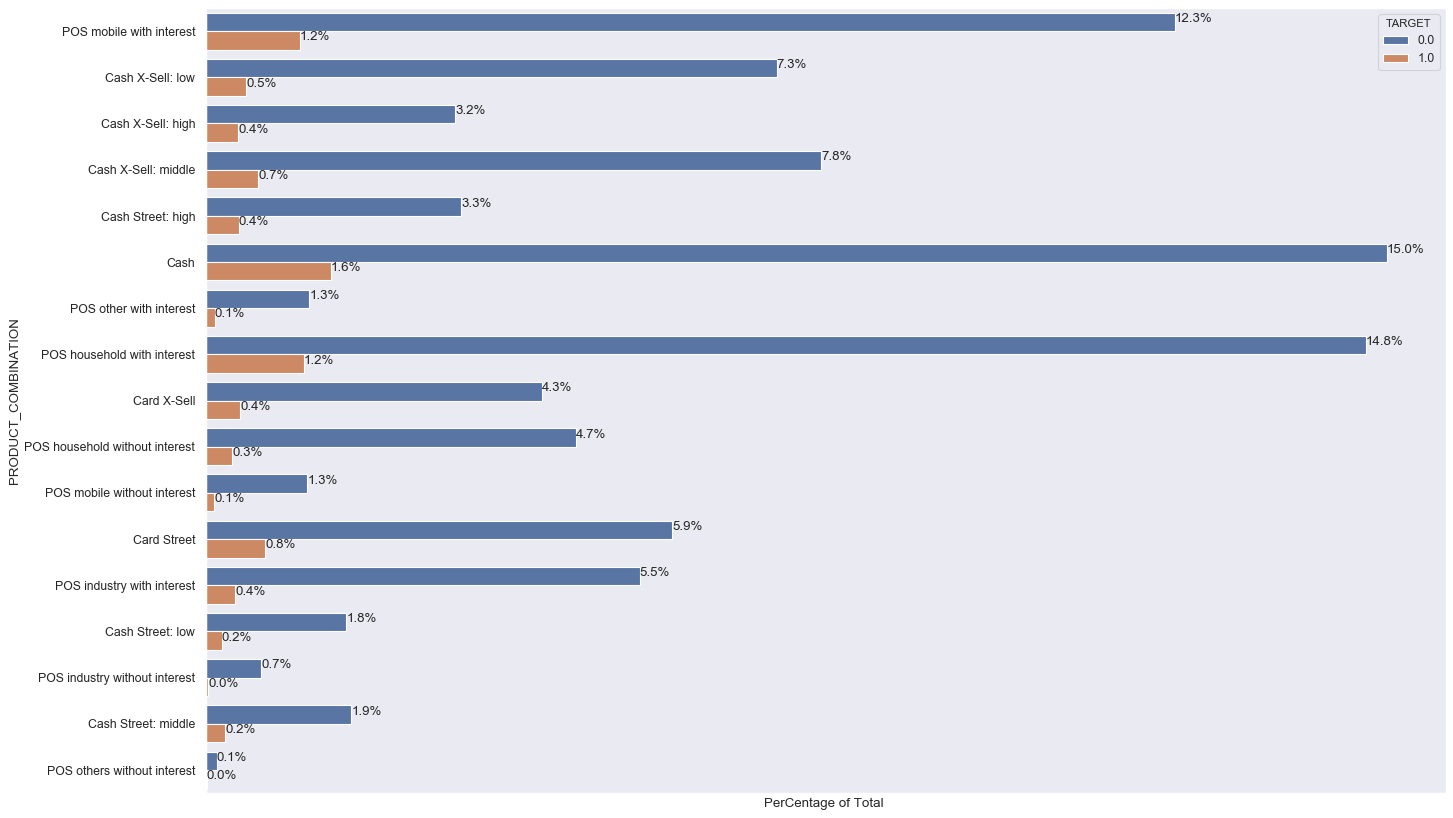

In [43]:
for I in Col_catg:
  DF1=Master_DF[Master_DF[I]!='XAP']
  DF1=DF1[DF1[I]!='XNA'] 
  plt.figure(num=None, figsize=(20,13), dpi=80, facecolor='w', edgecolor='k')
  ax = sns.countplot(y=I,hue='TARGET', data=DF1)
  plt.xlabel('PerCentage of Total ')
  total = len(DF1[I])
  for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
  plt.xticks([])
  plt.show()

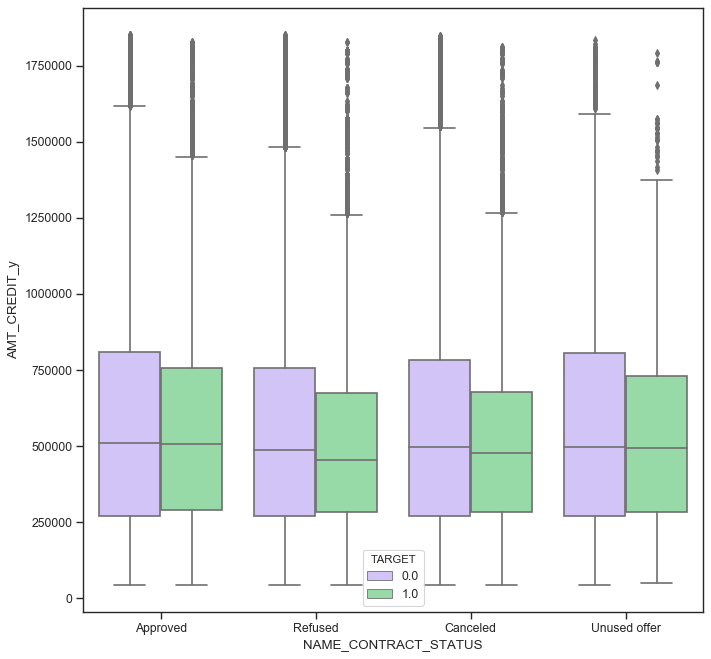

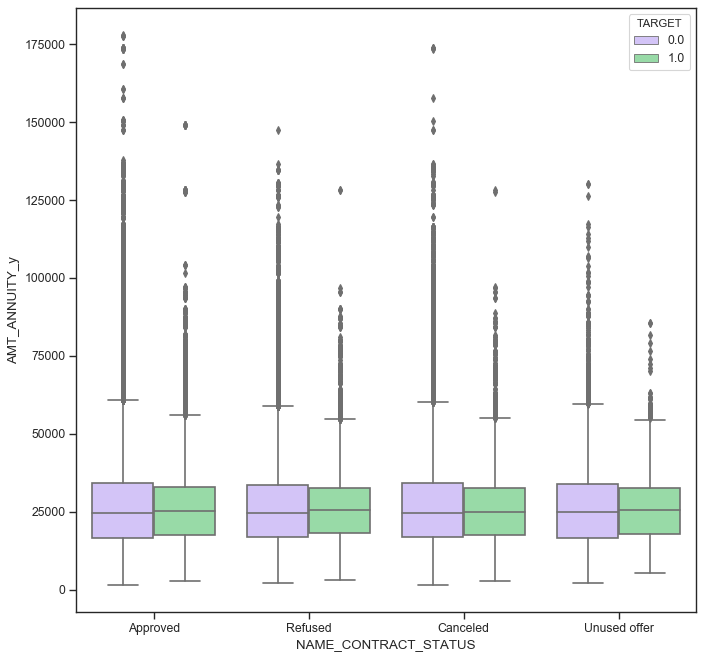

In [44]:
sns.set(style="ticks", palette="pastel")
plt.figure(num=None, figsize=(10,10), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(y='AMT_CREDIT_y',
            x="NAME_CONTRACT_STATUS",hue='TARGET', palette=["m", "g"],
            data=Master_DF)
plt.show()
plt.figure(num=None, figsize=(10,10), dpi=80, facecolor='w', edgecolor='k')

sns.boxplot(y='AMT_ANNUITY_y',
            x="NAME_CONTRACT_STATUS", hue='TARGET',palette=["m", "g"],
            data=Master_DF)
plt.show()

### By Joining with the previous application data we have more concrede analysis and pattern for people defaulting the loan . few of them mentioned below 

``` Previous Payment Type  ``` As per previous record most of the applications are cash through bank (99%) and and 1/10th of the applicant is likely to default .

```  Client Type ```  There are lot of repeated application received and only  1 out of 12 applications likely to default so it is safe for the bank to give loans ,

``` Goods Catagory ``` Loans Avalied for Cellphone have higher chances of defalut and it is most common reason for loan application as well .

``` Days to decide ``` The longer it took to decide the lower is the risk of defalut as the ratio of default for days decission is pretty low for higher values for days taken. 

``` Prev Credit  Amount and Req status ```  Looking at the outliers of defaluter/approved box plot ,There are a lot of approved applications with higher than usual amount of money are defaulted .
